data : https://drive.google.com/drive/folders/1_j-Ls_vKTZsGR3CH-gcf4MQQNKKwMpZy?usp=sharing  \\

site : https://ndap.niti.gov.in/dataset/7078  \\



**reference** : https://www.frontiersin.org/articles/10.3389/fenvs.2020.581591/full

planning :  \\

 standard deviation  on y , numeriac columns on  x - plot

The dataset contains water quality data with 2620 entries and 21 columns. Here are some key aspects of the data and suggested preprocessing steps:

Data Columns and Their Types
Country, State, Year, Name of the Station: Categorical text data.
Station Code: Numerical identifier (one missing value).
Temperature, Dissolved Oxygen, pH, Conductivity, Biochemical Oxygen Demand, Total Coliforms, Faecal Coliforms: These are numerical measurements with different units, mostly complete but some missing values are present.
Suggested Preprocessing Steps
Handling Missing Values:
For columns with a small percentage of missing values (e.g., temperature, dissolved oxygen), consider imputation with the median or mean of the column.
For columns with a significant amount of missing data (if any), evaluate if dropping the column is necessary based on its importance to your analysis.
Data Type Conversion:
Ensure that all data types are appropriate for their respective columns. Convert Year to a numerical data type if it is intended to be used as a number.
Outlier Detection:
Investigate potential outliers in key numerical columns, which might affect the analysis.
Normalization or Standardization:
Depending on your analysis needs, consider normalizing or standardizing numerical columns, especially if you plan to use machine learning techniques that are sensitive to the scale of the data.
Example Code for Preprocessing
Below is an example of preprocessing code in Python that handles missing values and data type conversion:





 PH range : 6.5–8.5 \\
temperature in C:5 - 25  \\
dissolved oxygen: 6.5-8 mg/L \\
 conductivityl level : 200 to 1000 µS/cm \\
 nitrate: less than 1.0 mg/L \\
 biochemical oxygen demand : less than 5 mg/L  \\
 fecal range : 500 and maximum permissible limit of 2,500 mpn
 coliform - 0-  200

# **Cleaning of Data:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
water_quality_data=pd.read_csv("/content/water_quality.csv");
water_quality_data.info(), water_quality_data.head()
# df.head()

In [ ]:
# Convert 'Year' to numeric
water_quality_data['Year'] = water_quality_data['Year'].str[-4:].astype(int)
print(water_quality_data)

print("Column names:", water_quality_data.columns.tolist())

In [ ]:
# Renaming columns
water_quality_data.rename(columns={
    'Minimum Temperature For River Water (UOM:°C(Centigrade))': 'min_temp',
    'Maximum Temperature For River Water (UOM:°C(Centigrade))': 'max_temp',
    'Minimum Value Of Dissolved Oxygen (UOM:mg/L(Milligramsperliter))': 'min_dissolve_o2(mg/l)',
    'Maximum Value Of Dissolved Oxygen (UOM:mg/L(Milligramsperliter))': 'max_dissolve_o2(mg/l)',
    'Minimum Potential Of Hydrogen Value In River Water (UOM:pH)': 'min_pH',
    'Maximum Potential Of Hydrogen Value In River Water (UOM:pH)': 'max_pH',
    'Minimum Conductivity Level (UOM:Âµmhos/cm(Micromhospercentimeter))': 'min_Conductivity_Level',
    'Maximum Conductivity Level (UOM:Âµmhos/cm(Micromhospercentimeter))': 'max_Conductivity_Level',
    'Minimum Biochemical Oxygen Demand (UOM:mg/L(Milligramsperliter))': 'min_BOD_mg_per_L',
    'Maximum Biochemical Oxygen Demand (UOM:mg/L(Milligramsperliter))': 'max_BOD_mg_per_L',
    'Minimum Of Nitrate N + Nitrite N Required For River Water (UOM:mg/L(Milligramsperliter))': 'min_Nitrate_Nitrite_mg_per_L',
    'Maximum Of Nitrate N + Nitrite N Required For River Water (UOM:mg/L(Milligramsperliter))': 'max_Nitrate_Nitrite_mg_per_L',
    'Minimum Of Faecal Coliforms Required For River Water (UOM:MPN/100ML(MostprobableNumberper100mililiters))': 'min_Faecal_Coliforms_MPN_per_100mL',
    'Maximum  Of Faecal Coliforms Required For River Water (UOM:MPN/100ML(MostprobableNumberper100mililiters))': 'max_Faecal_Coliforms_MPN_per_100mL',
    'Minimum Coliform Required For River Water (UOM:MPN/100ML(MostprobableNumberper100mililiters))': 'min_Coliform_MPN_per_100mL',
    'Maximum Coliform Required For River Water (UOM:MPN/100ML(MostprobableNumberper100mililiters))': 'max_Coliform_MPN_per_100mL'
}, inplace=True)

# Print the updated column names
print("Updated Column names:", water_quality_data.columns.tolist())


Updated Column names: ['Country', 'State', 'Year', 'Station Code', 'Name Of The Station', 'min_temp', 'max_temp', 'min_dissolve_o2(mg/l)', 'max_dissolve_o2(mg/l)', 'min_pH', 'max_pH', 'min_Conductivity_Level', 'max_Conductivity_Level', 'min_BOD_mg_per_L', 'max_BOD_mg_per_L', 'min_Nitrate_Nitrite_mg_per_L', 'max_Nitrate_Nitrite_mg_per_L', 'min_Faecal_Coliforms_MPN_per_100mL', 'max_Faecal_Coliforms_MPN_per_100mL', 'min_Coliform_MPN_per_100mL', 'max_Coliform_MPN_per_100mL']


In [ ]:
# Impute missing values with the median
print(water_quality_data.iloc[256])
water_quality_data['min_temp'].fillna(water_quality_data['min_temp'].mean(), inplace=True)
water_quality_data['max_temp'].fillna(water_quality_data['max_temp'].mean(), inplace=True)
water_quality_data['min_dissolve_o2(mg/l)'].fillna(water_quality_data['min_dissolve_o2(mg/l)'].mean(), inplace=True)
water_quality_data['max_dissolve_o2(mg/l)'].fillna(water_quality_data['max_dissolve_o2(mg/l)'].mean(), inplace=True)
water_quality_data['min_pH'].fillna(water_quality_data['min_pH'].mean(), inplace=True)
water_quality_data['max_pH'].fillna(water_quality_data['max_pH'].mean(), inplace=True)
water_quality_data['min_Conductivity_Level'].fillna(water_quality_data['min_Conductivity_Level'].mean(), inplace=True)
water_quality_data['max_Conductivity_Level'].fillna(water_quality_data['max_Conductivity_Level'].mean(), inplace=True)
water_quality_data['min_BOD_mg_per_L'].fillna(water_quality_data['min_BOD_mg_per_L'].mean(), inplace=True)
water_quality_data['max_BOD_mg_per_L'].fillna(water_quality_data['max_BOD_mg_per_L'].mean(), inplace=True)
water_quality_data['min_Nitrate_Nitrite_mg_per_L'].fillna(water_quality_data['min_Nitrate_Nitrite_mg_per_L'].mean(), inplace=True)
water_quality_data['max_Nitrate_Nitrite_mg_per_L'].fillna(water_quality_data['max_Nitrate_Nitrite_mg_per_L'].mean(), inplace=True)
water_quality_data['min_Faecal_Coliforms_MPN_per_100mL'].fillna(water_quality_data['min_Faecal_Coliforms_MPN_per_100mL'].mean(), inplace=True)
water_quality_data['max_Faecal_Coliforms_MPN_per_100mL'].fillna(water_quality_data['max_Faecal_Coliforms_MPN_per_100mL'].mean(), inplace=True)
water_quality_data['min_Coliform_MPN_per_100mL'].fillna(water_quality_data['min_Coliform_MPN_per_100mL'].mean(), inplace=True)
water_quality_data['max_Coliform_MPN_per_100mL'].fillna(water_quality_data['max_Coliform_MPN_per_100mL'].mean(), inplace=True)
# testing one row
print(water_quality_data.iloc[256])

In [ ]:
# clearing the rows which has empty station code, station name, year, country and state
print(water_quality_data.iloc[256])
cleaned_df = water_quality_data.dropna(subset=['Station Code', 'Name Of The Station', 'Year', 'Country', 'State'])

cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df['min_pH'] = np.where(cleaned_df['min_pH'] > 14, 14, cleaned_df['min_pH'])
cleaned_df['max_pH'] = np.where(cleaned_df['max_pH'] > 14, 14, cleaned_df['max_pH'])
print(cleaned_df.iloc[256])
# print(cleaned_df)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from tabulate import tabulate
import scipy.stats as stats

# **Describing the parameters:**

In [ ]:
pd.set_option('display.max_columns', None)
parameters_of_interest = [
   'min_temp', 'max_temp', 'min_dissolve_o2(mg/l)', 'max_dissolve_o2(mg/l)', 'min_pH', 'max_pH', 'min_Conductivity_Level', 'max_Conductivity_Level', 'min_BOD_mg_per_L', 'max_BOD_mg_per_L', 'min_Nitrate_Nitrite_mg_per_L', 'max_Nitrate_Nitrite_mg_per_L', 'min_Faecal_Coliforms_MPN_per_100mL', 'max_Faecal_Coliforms_MPN_per_100mL', 'min_Coliform_MPN_per_100mL', 'max_Coliform_MPN_per_100mL'
]

mean = cleaned_df[parameters_of_interest].mean()
# print(mean)
# central tendency of the refugee count
trans_df=cleaned_df[parameters_of_interest].describe().transpose()
# Convert the transposed DataFrame to a table format
table = tabulate(trans_df, headers='keys', tablefmt='fancy_grid')

# Display the table
print(table)

╒════════════════════════════════════╤═════════╤════════════════╤══════════════════╤═══════╤═════════╤═════════╤══════════════╤══════════════╕
│                                    │   count │           mean │              std │   min │     25% │     50% │          75% │          max │
╞════════════════════════════════════╪═════════╪════════════════╪══════════════════╪═══════╪═════════╪═════════╪══════════════╪══════════════╡
│ min_temp                           │    2619 │   17.7541      │      6.01544     │   0   │  15     │   19    │    22        │     32       │
├────────────────────────────────────┼─────────┼────────────────┼──────────────────┼───────┼─────────┼─────────┼──────────────┼──────────────┤
│ max_temp                           │    2619 │   28.6337      │      6.38974     │   0   │  26     │   30    │    32.25     │     52       │
├────────────────────────────────────┼─────────┼────────────────┼──────────────────┼───────┼─────────┼─────────┼──────────────┼──────────────┤

# **Plotting above table:**

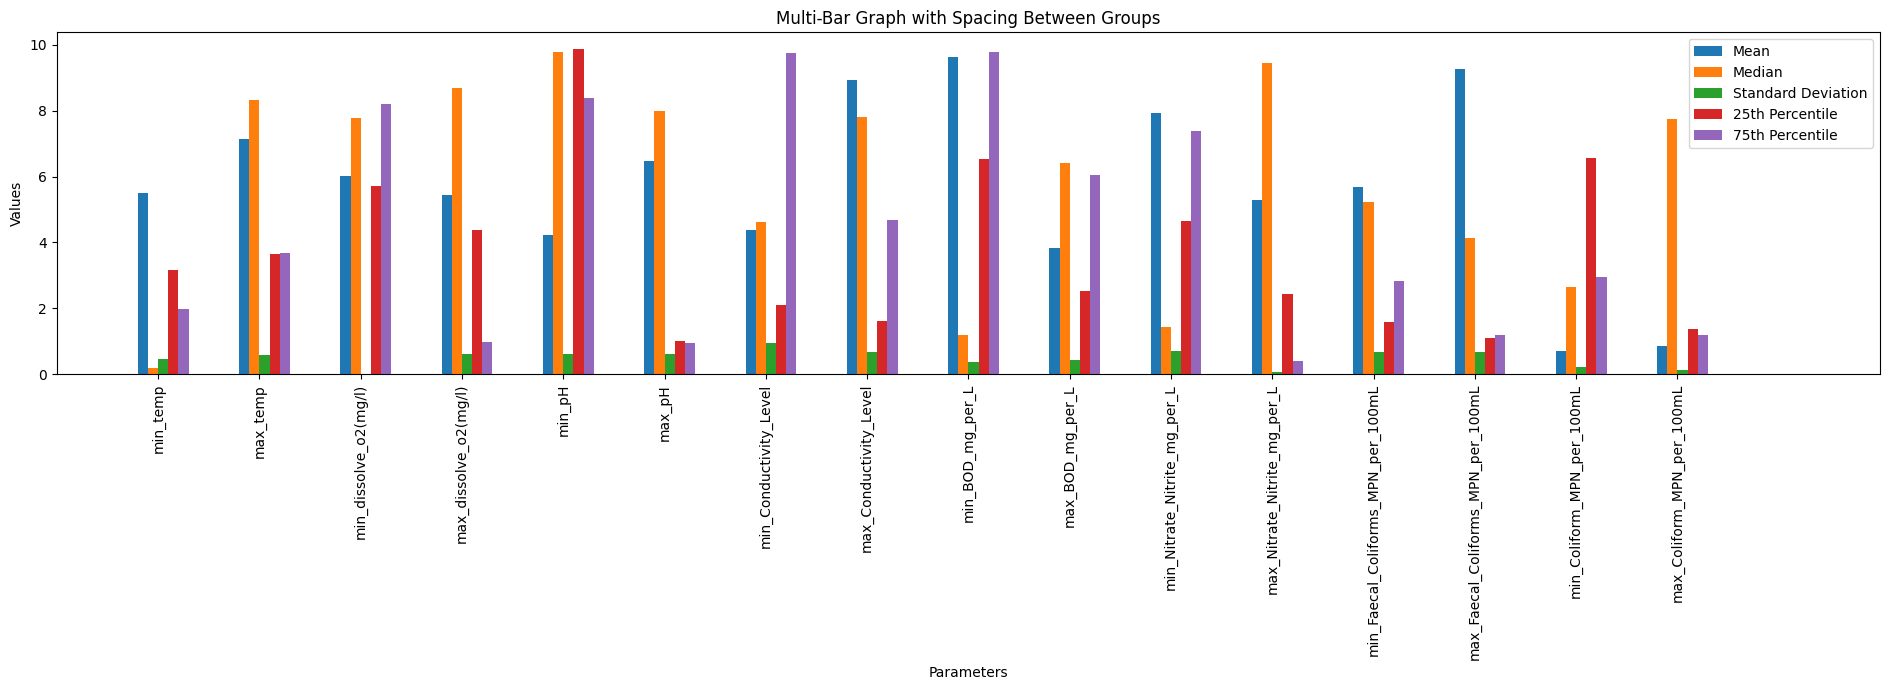

In [ ]:
np.random.seed(0)  # For reproducibility

# Mock data simulating the descriptive statistics from 'trans_df'
data = {
    'mean': np.random.rand(16) * 10,
    '50%': np.random.rand(16) * 10,  # Median
    'std': np.random.rand(16),  # Standard Deviation
    '25%': np.random.rand(16) * 10,  # Lower Quartile
    '75%': np.random.rand(16) * 10,  # Upper Quartile
}

# Create a DataFrame
trans_df_mock = pd.DataFrame(data, index=parameters_of_interest)

width = 0.2

fig, ax = plt.subplots(figsize=(19, 7))

# New positions with a gap of 1 unit between each group
positions = np.arange(0, len(trans_df_mock)*2, 2)  # Double the step for a gap of 1 unit

# Plotting each statistic with adjusted positions for the 1 unit gap
ax.bar(positions - width*1.5, trans_df_mock['mean'], width=width, label='Mean')
ax.bar(positions - width/2, trans_df_mock['50%'], width=width, label='Median')
ax.bar(positions + width/2, trans_df_mock['std'], width=width, label='Standard Deviation')
ax.bar(positions + width*1.5, trans_df_mock['25%'], width=width, label='25th Percentile')
ax.bar(positions + width*2.5, trans_df_mock['75%'], width=width, label='75th Percentile')

# Adding labels and title
ax.set_xlabel('Parameters')
ax.set_ylabel('Values')
ax.set_title('Multi-Bar Graph with Spacing Between Groups')
ax.set_xticks(positions)
ax.set_xticklabels(trans_df_mock.index, rotation=90)
ax.legend(facecolor= 'white')

# Setting x-axis limits to fit the bars well within the figure
ax.set_xlim(-2, positions[-1] + 4)

# Display the multi-bar graph
plt.tight_layout()
plt.show()


# **Impact of Temperature on Dissolved Oxygen:**

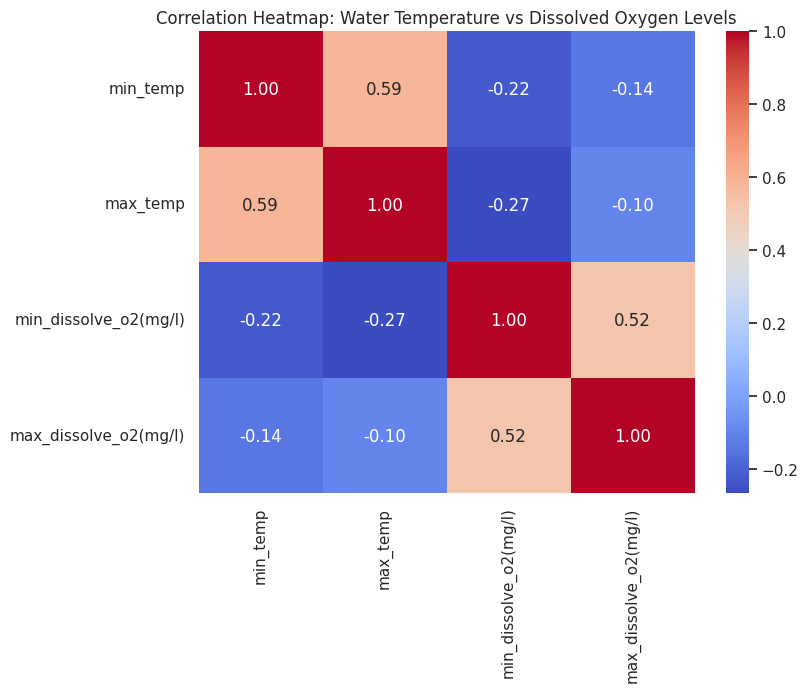

In [ ]:
data_for_analysis = cleaned_df[['min_temp', 'max_temp', 'min_dissolve_o2(mg/l)', 'max_dissolve_o2(mg/l)']]

# Compute the correlation matrix
correlation_matrix = data_for_analysis.corr()

table = tabulate(correlation_matrix, headers='keys', tablefmt='fancy_grid')

sns.set(style="white")

plt.figure(figsize=(8, 6))

# Generating a heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap: Water Temperature vs Dissolved Oxygen Levels')

# Show the plot
plt.show()


# **Yearly Variation in Nitrate Levels:**

<Figure size 1500x600 with 0 Axes>

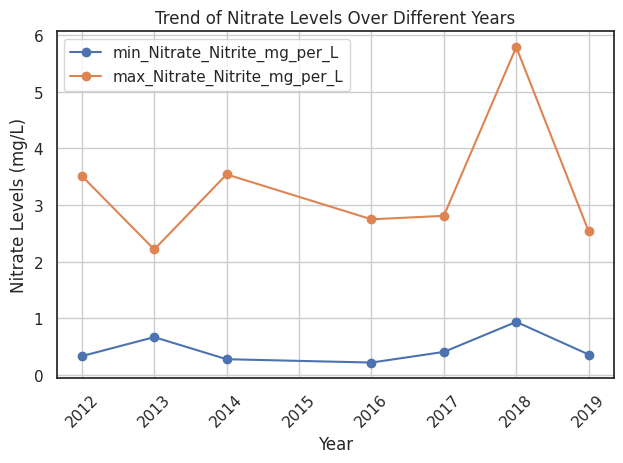

In [ ]:
# Group the data by year and calculate the mean nitrate levels for each year
nitrate_yearly_mean = cleaned_df.groupby('Year')[['min_Nitrate_Nitrite_mg_per_L', 'max_Nitrate_Nitrite_mg_per_L']].mean()

# Plot the trend of nitrate levels over different years
plt.figure(figsize=(15, 6))
nitrate_yearly_mean.plot(marker='o')
plt.title('Trend of Nitrate Levels Over Different Years')
plt.xlabel('Year')
plt.ylabel('Nitrate Levels (mg/L)')
plt.grid(True)
plt.legend(['min_Nitrate_Nitrite_mg_per_L', 'max_Nitrate_Nitrite_mg_per_L'], loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Effect of Human Activities on BOD Levels (Maharashtra & Gujarat):**
##### Hypothesis- There is a significant difference in the below state's avg min/max BOD level and all state's avg min/max BOD level
##### Null hypothesis- There's no significant difference

In [ ]:
selected_states = ['Maharashtra', 'Gujarat']

# Perform t-tests for each state
for state in selected_states:

    state_stations = cleaned_df[cleaned_df['State'] == state]

    t_statistic_min, p_value_min = stats.ttest_1samp(state_stations['min_BOD_mg_per_L'], cleaned_df['min_BOD_mg_per_L'].mean())
    t_statistic_max, p_value_max = stats.ttest_1samp(state_stations['max_BOD_mg_per_L'], cleaned_df['max_BOD_mg_per_L'].mean())

    # Print the results
    print(f"T-Test Results for min_BOD_mg_per_L in {state}:")
    print(f"T-Statistic: {t_statistic_min}")
    print(f"P-Value: {p_value_min}")

    print(f"\nT-Test Results for max_BOD_mg_per_L in {state}:")
    print(f"T-Statistic: {t_statistic_max}")
    print(f"P-Value: {p_value_max}")
    print("\n")


T-Test Results for min_BOD_mg_per_L in Maharashtra:
T-Statistic: 12.73360345033172
P-Value: 1.6200920048559774e-28

T-Test Results for max_BOD_mg_per_L in Maharashtra:
T-Statistic: 9.302993667512508
P-Value: 1.0605589015332388e-17


T-Test Results for min_BOD_mg_per_L in Gujarat:
T-Statistic: 0.19663116576362888
P-Value: 0.844460266270451

T-Test Results for max_BOD_mg_per_L in Gujarat:
T-Statistic: 1.2316111249320452
P-Value: 0.22058533356531987




For Maharashtra:

The t-test for 'min_BOD_mg_per_L' resulted in a t-statistic of approximately  12.73360345033172 with a very small p-value (around
 1.6200920048559774e-28). This indicates a statistically significant difference between the mean BOD levels in Maharashtra's stations and the overall mean BOD levels in the dataset for the minimum BOD values.
The t-test for 'max_BOD_mg_per_L' resulted in a t-statistic of approximately 9.302993667512508 with a p-value of about 1.0605589015332388e-17. This suggests that there is a significant difference between the mean maximum BOD levels in Maharashtra's stations and the overall mean BOD levels. \\


For Gujarat:

The t-test for 'min_BOD_mg_per_L' yielded a t-statistic of approximately 0.197 with a p-value of around 0.844. This is in line with the previous results and suggests that there is no significant difference between the mean minimum BOD levels in Gujarat's stations and the overall mean BOD levels.
The t-test for 'max_BOD_mg_per_L' resulted in a t-statistic of about 1.232 with a p-value of approximately 0.221. This result is also similar to the earlier one and suggests that there is no significant difference between the mean maximum BOD levels in Gujarat's stations and the overall mean BOD levels.
In summary:

There is a significant difference in the mean minimum BOD levels for Karnataka compared to the dataset average, with Karnataka being lower.
For the maximum BOD levels in Karnataka and both the minimum and maximum BOD levels in Gujarat, there is no significant difference compared to the dataset average

#**Impact of Temperature on pH Levels:**

Correlation Coefficient (Temperature vs. pH): 0.05131747171855612


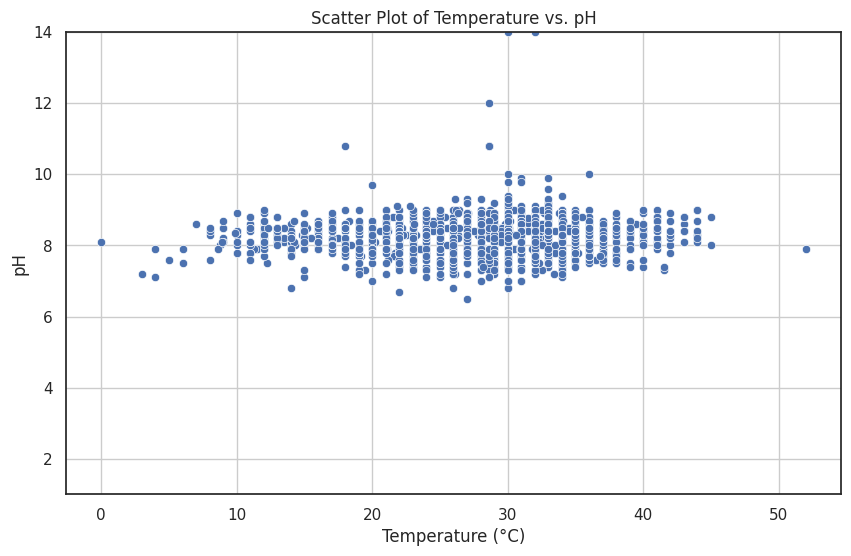

In [ ]:
temperature_column = 'max_temp'
ph_column = 'max_pH'

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_df[temperature_column], y=cleaned_df[ph_column])
plt.title('Scatter Plot of Temperature vs. pH')
plt.xlabel('Temperature (°C)')
plt.ylabel('pH')
plt.grid(True)

plt.ylim(1, 14)

# Calculate correlation coefficient
correlation_coefficient = cleaned_df[temperature_column].corr(cleaned_df[ph_column])
print(f"Correlation Coefficient (Temperature vs. pH): {correlation_coefficient}")

plt.show()


# **Relationship between BOD and Coliform Levels:**

Correlation Coefficient (BOD vs. Coliform Levels): 0.05198631503184813


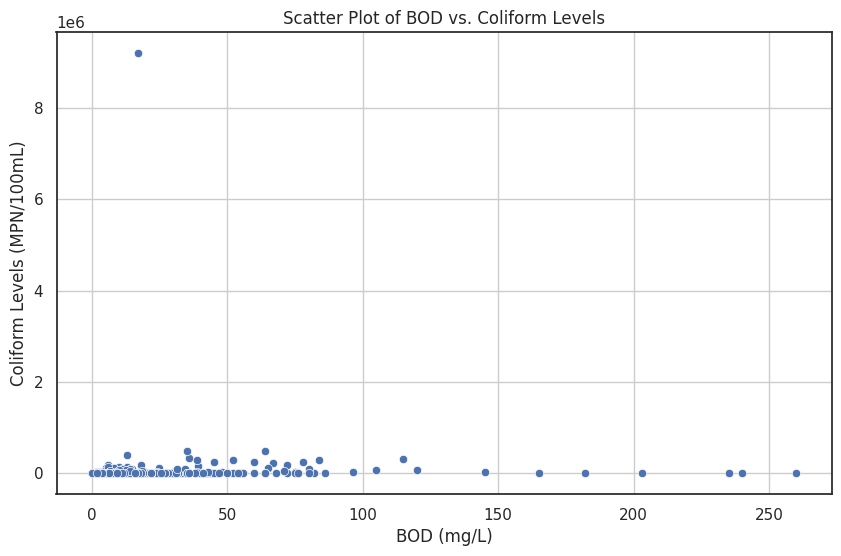

In [ ]:
bod_column = 'max_BOD_mg_per_L'
coliform_column = 'min_Coliform_MPN_per_100mL'

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_df[bod_column], y=cleaned_df[coliform_column])
plt.title('Scatter Plot of BOD vs. Coliform Levels')
plt.xlabel('BOD (mg/L)')
plt.ylabel('Coliform Levels (MPN/100mL)')
plt.grid(True)

# Calculate correlation coefficient
correlation_coefficient = cleaned_df[bod_column].corr(cleaned_df[coliform_column])
print(f"Correlation Coefficient (BOD vs. Coliform Levels): {correlation_coefficient}")

plt.show()


### **State vise variation in Parameters (Violin plot):**

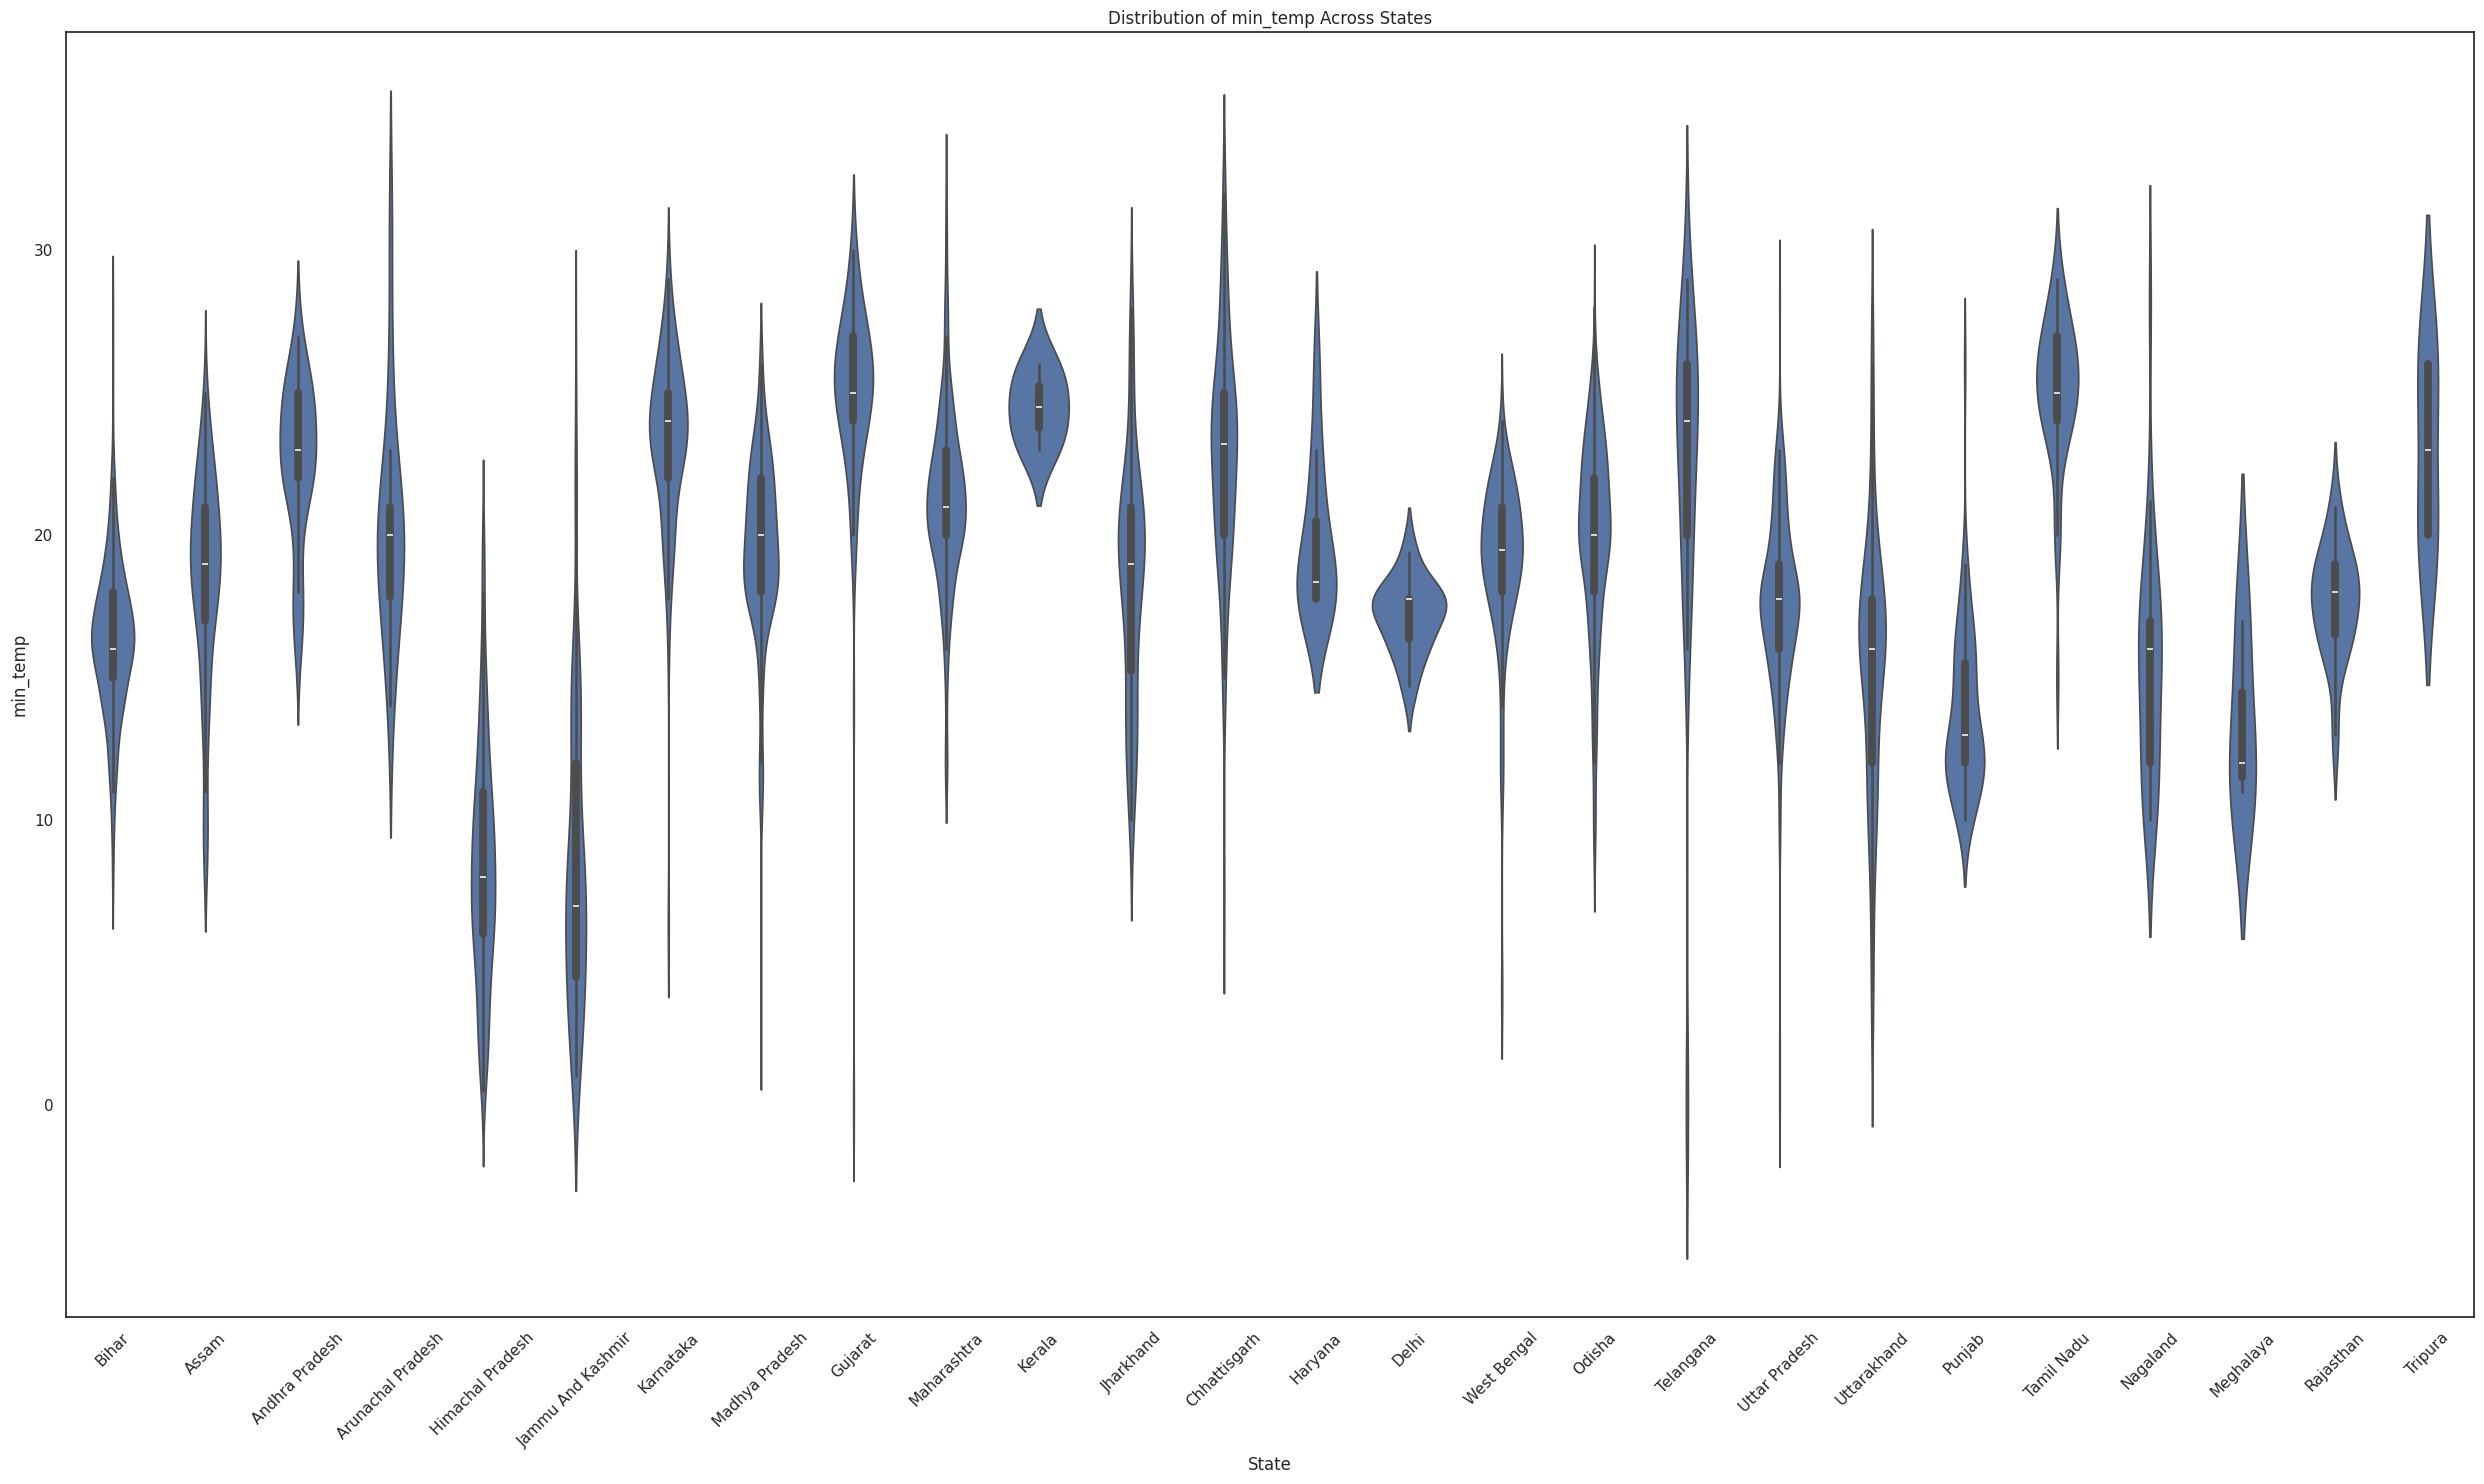

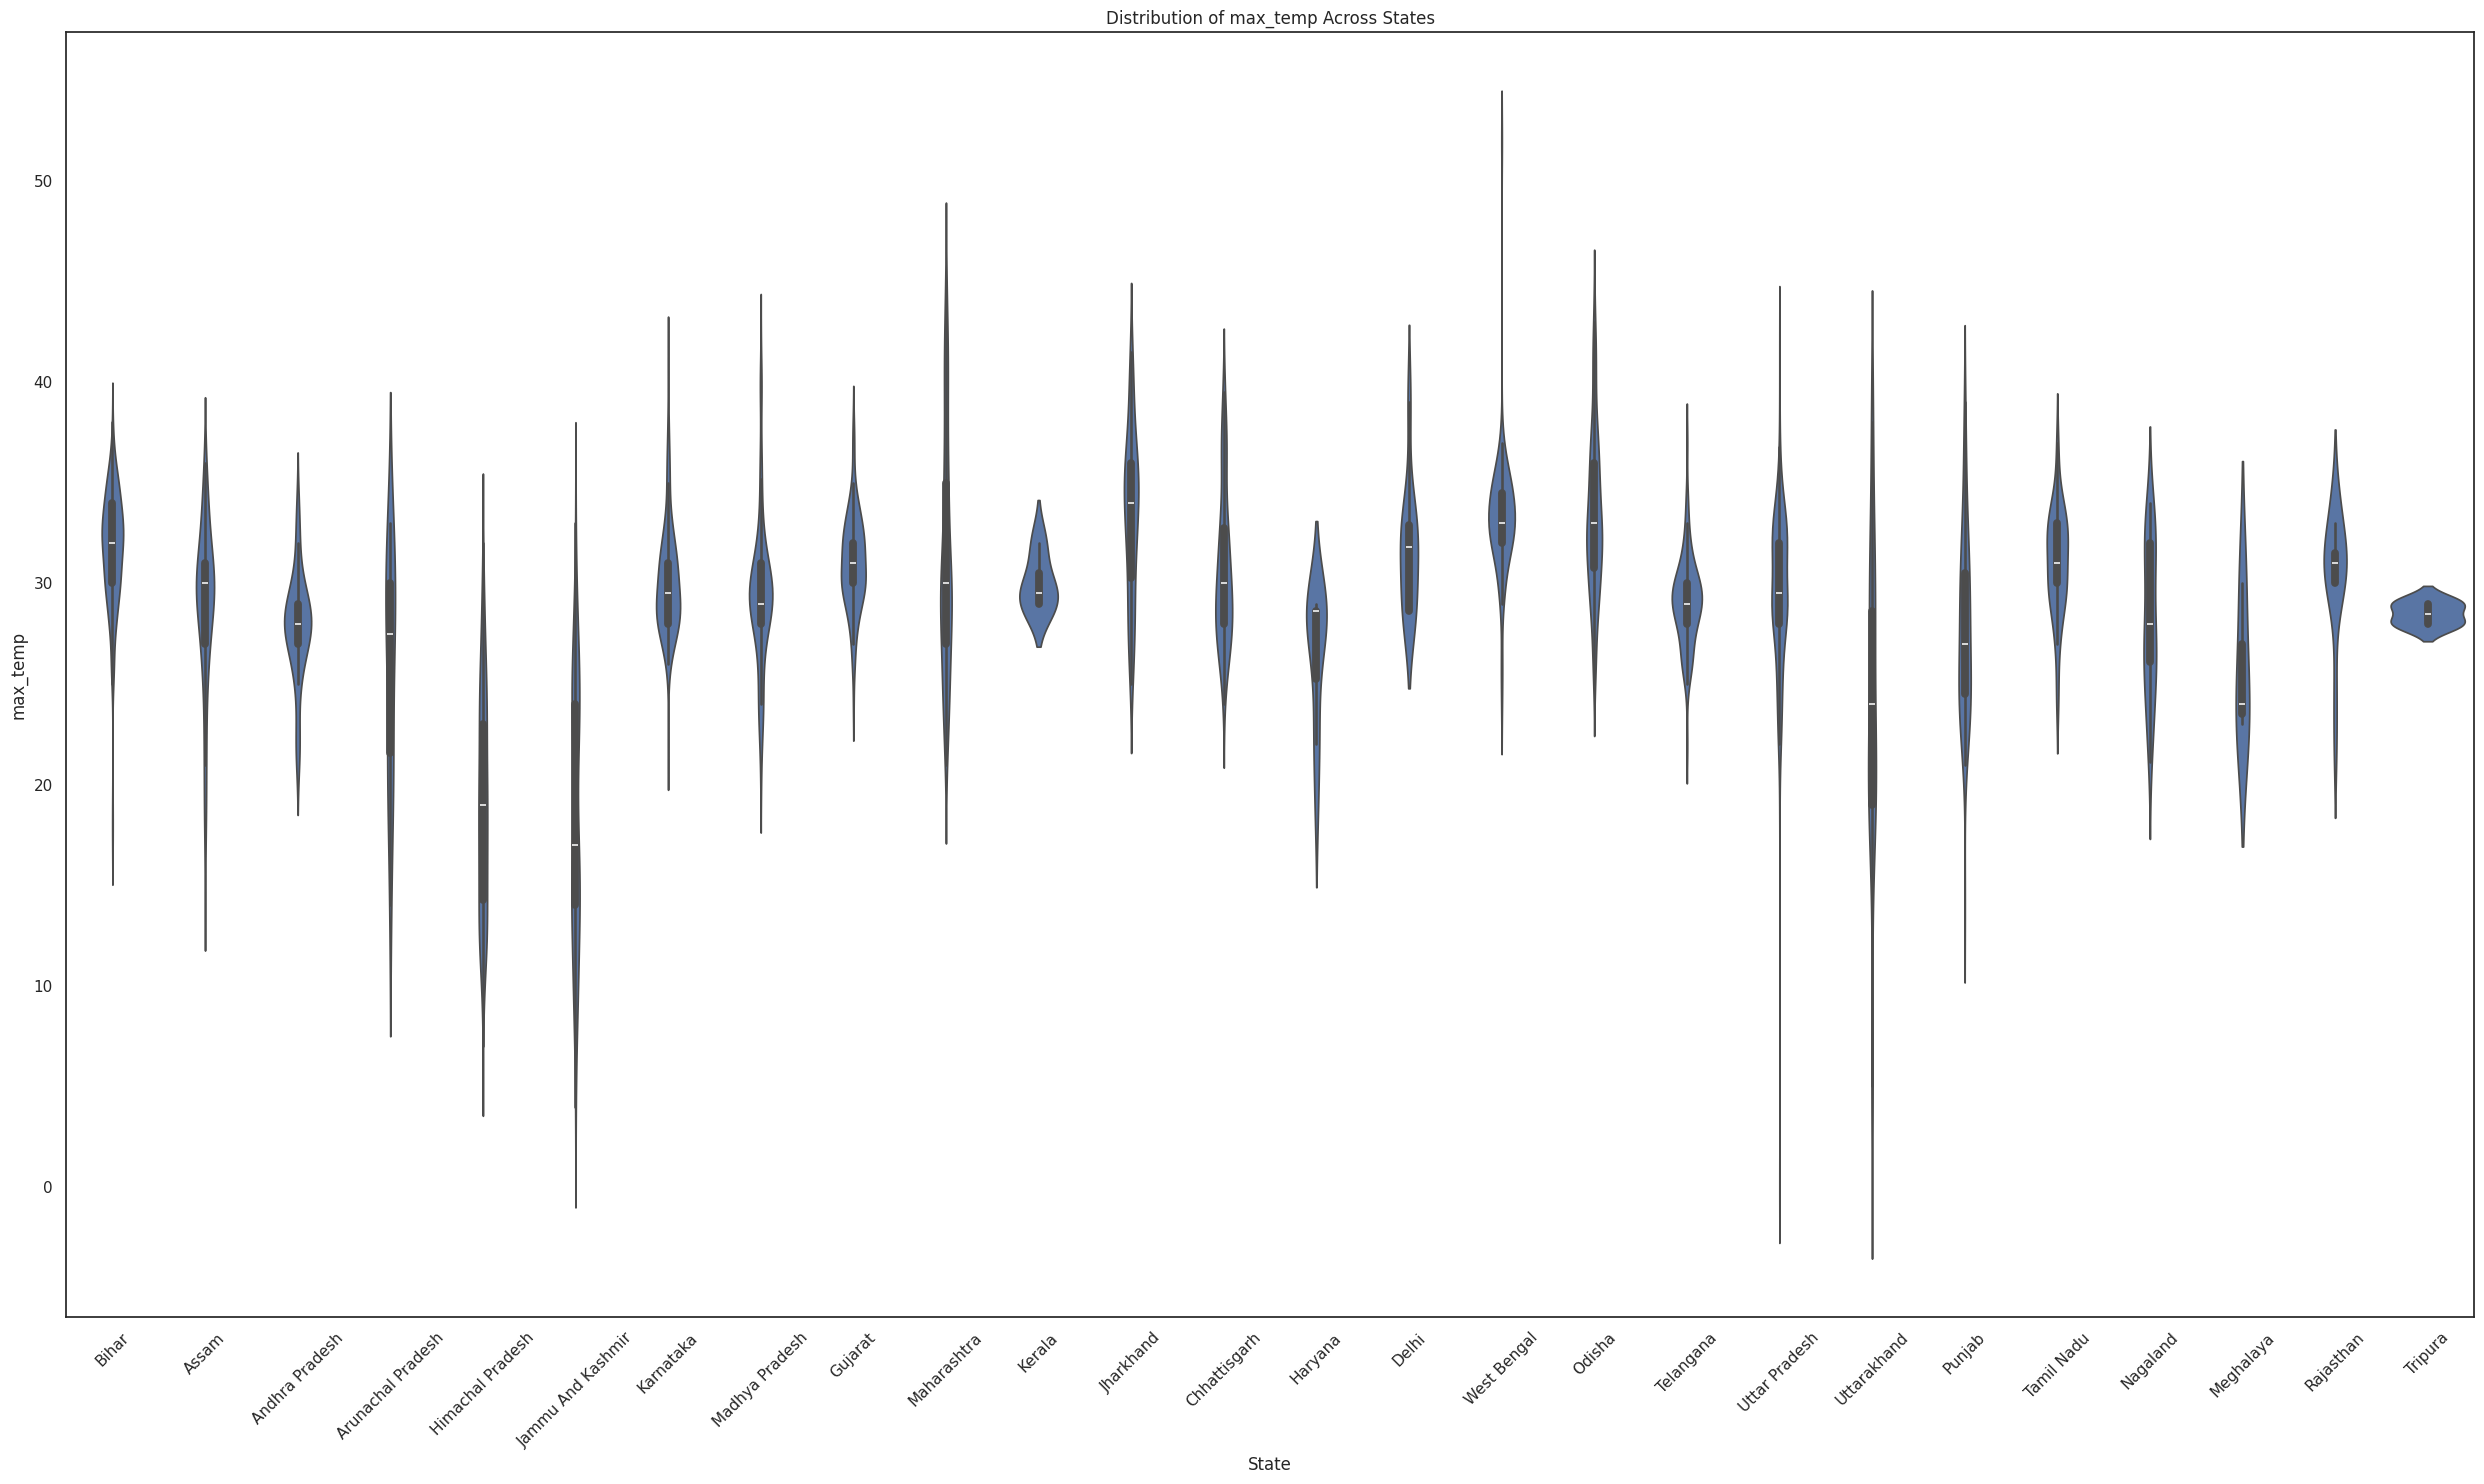

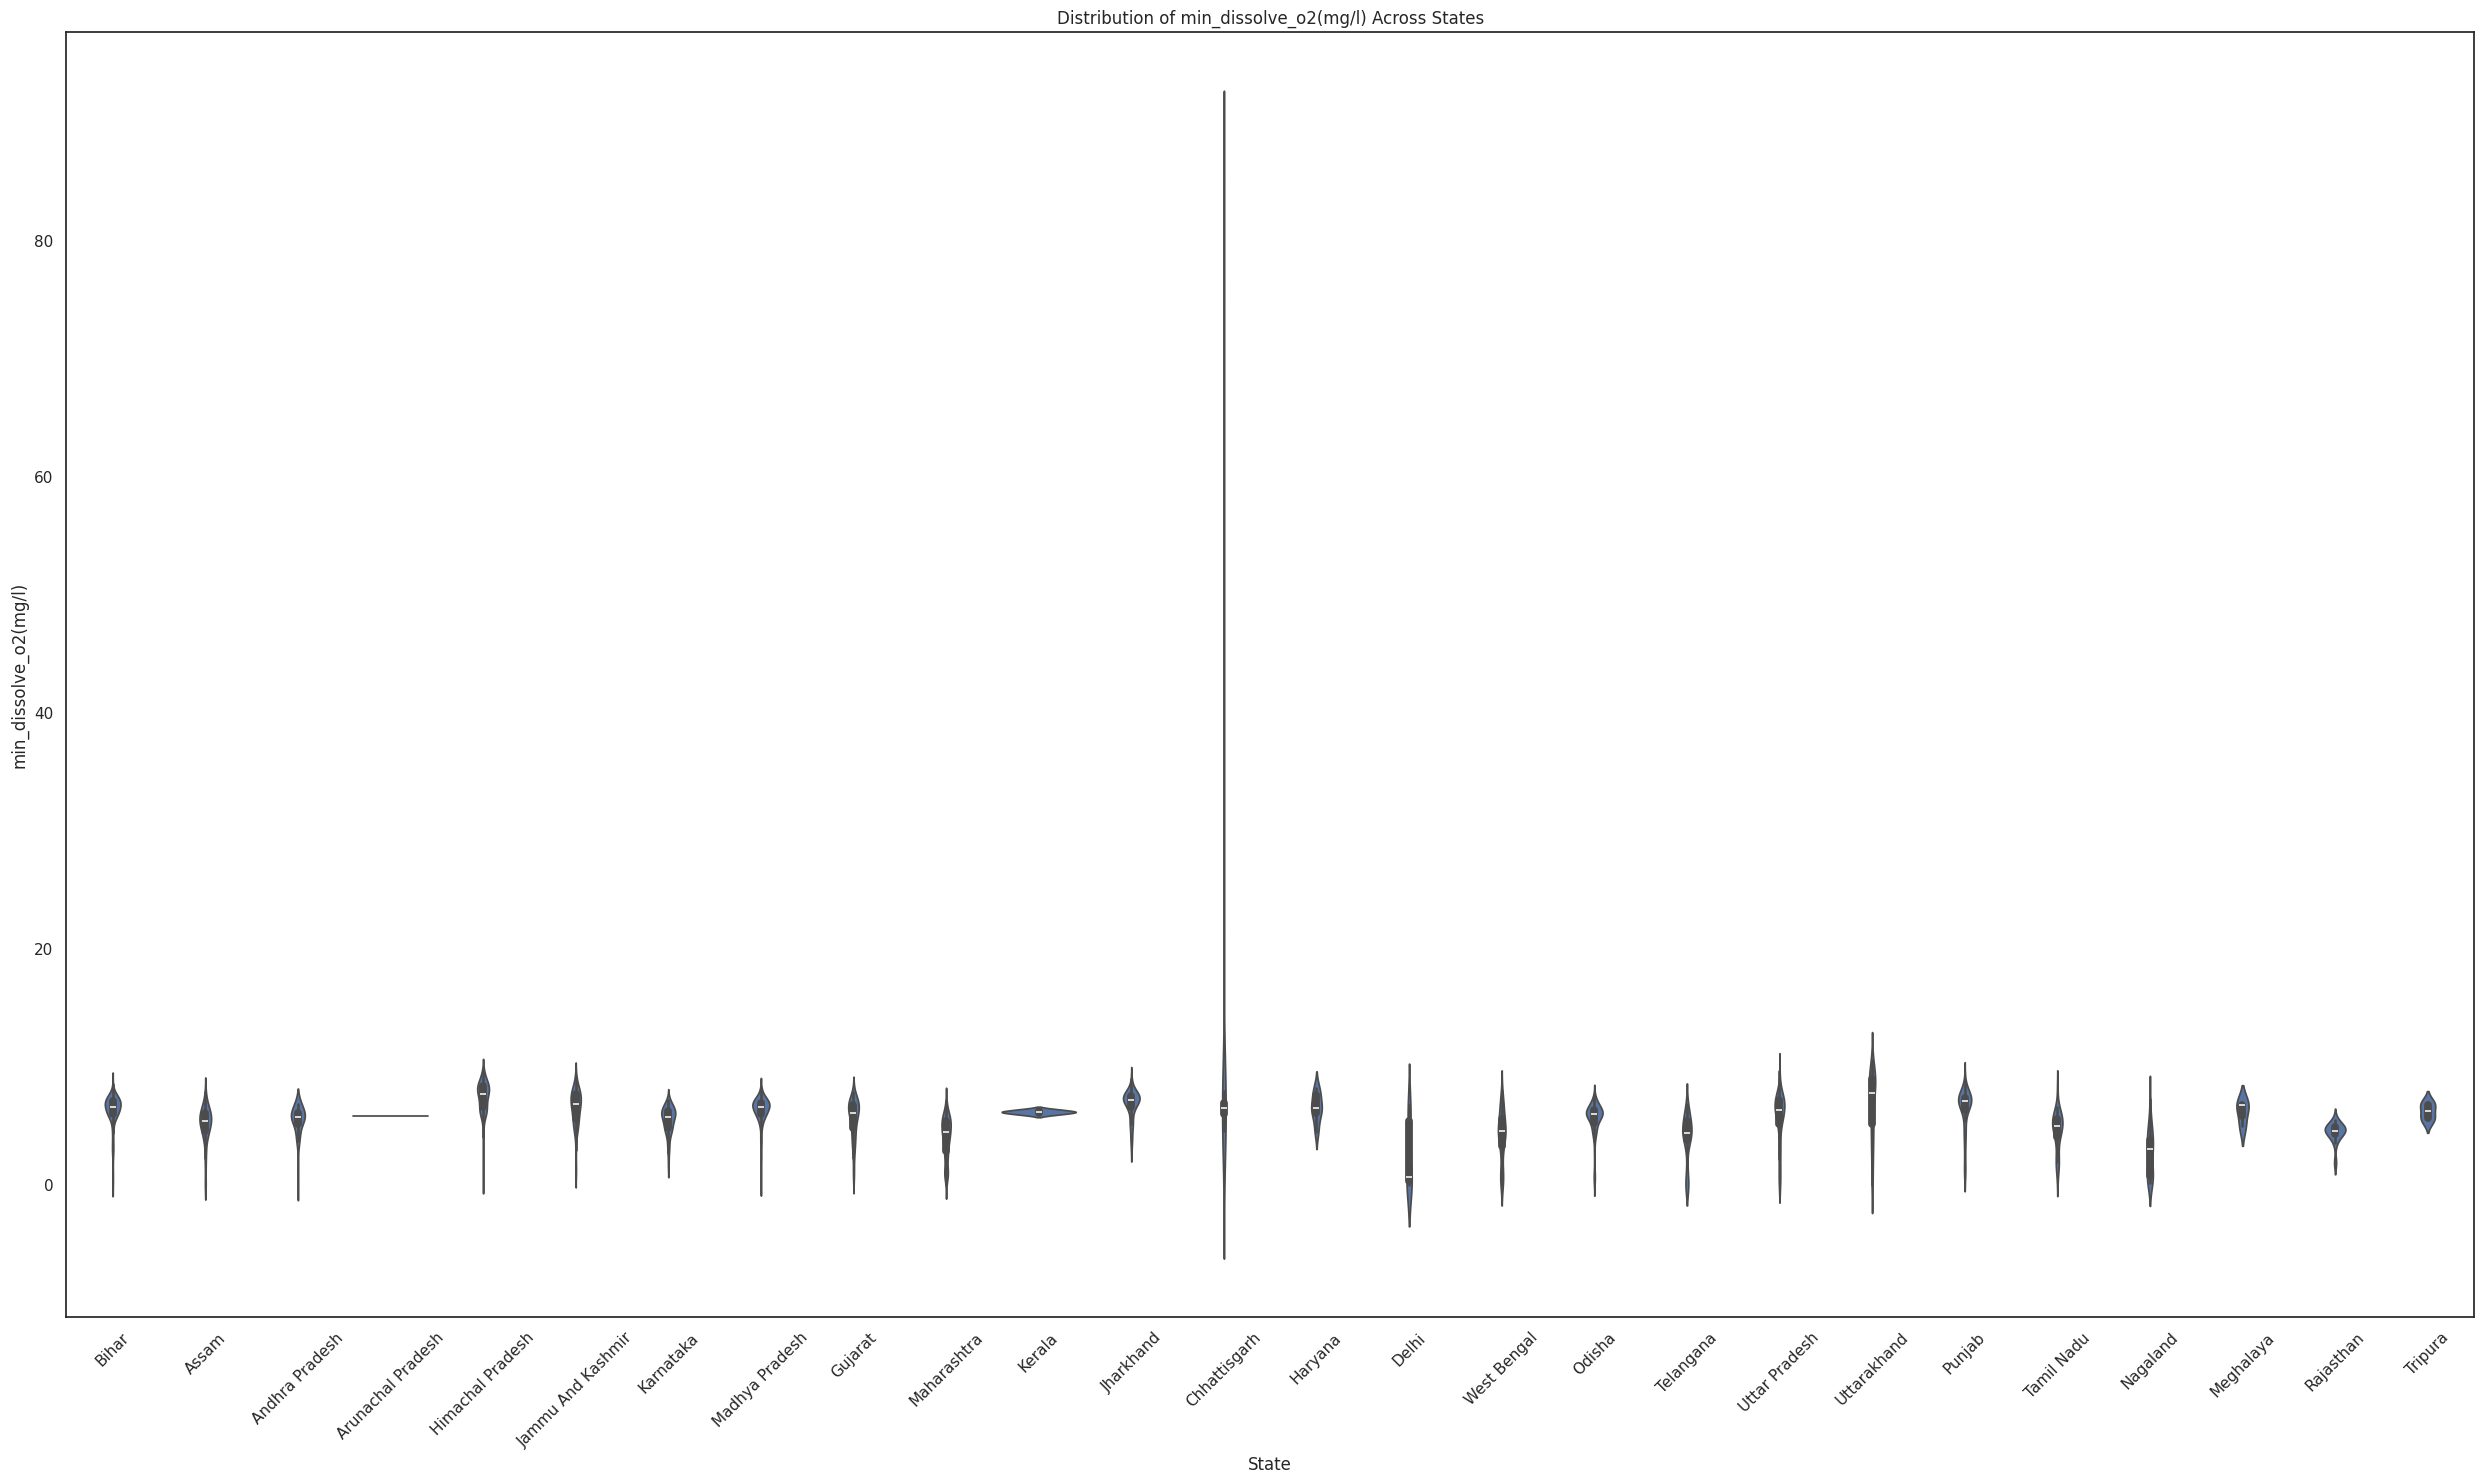

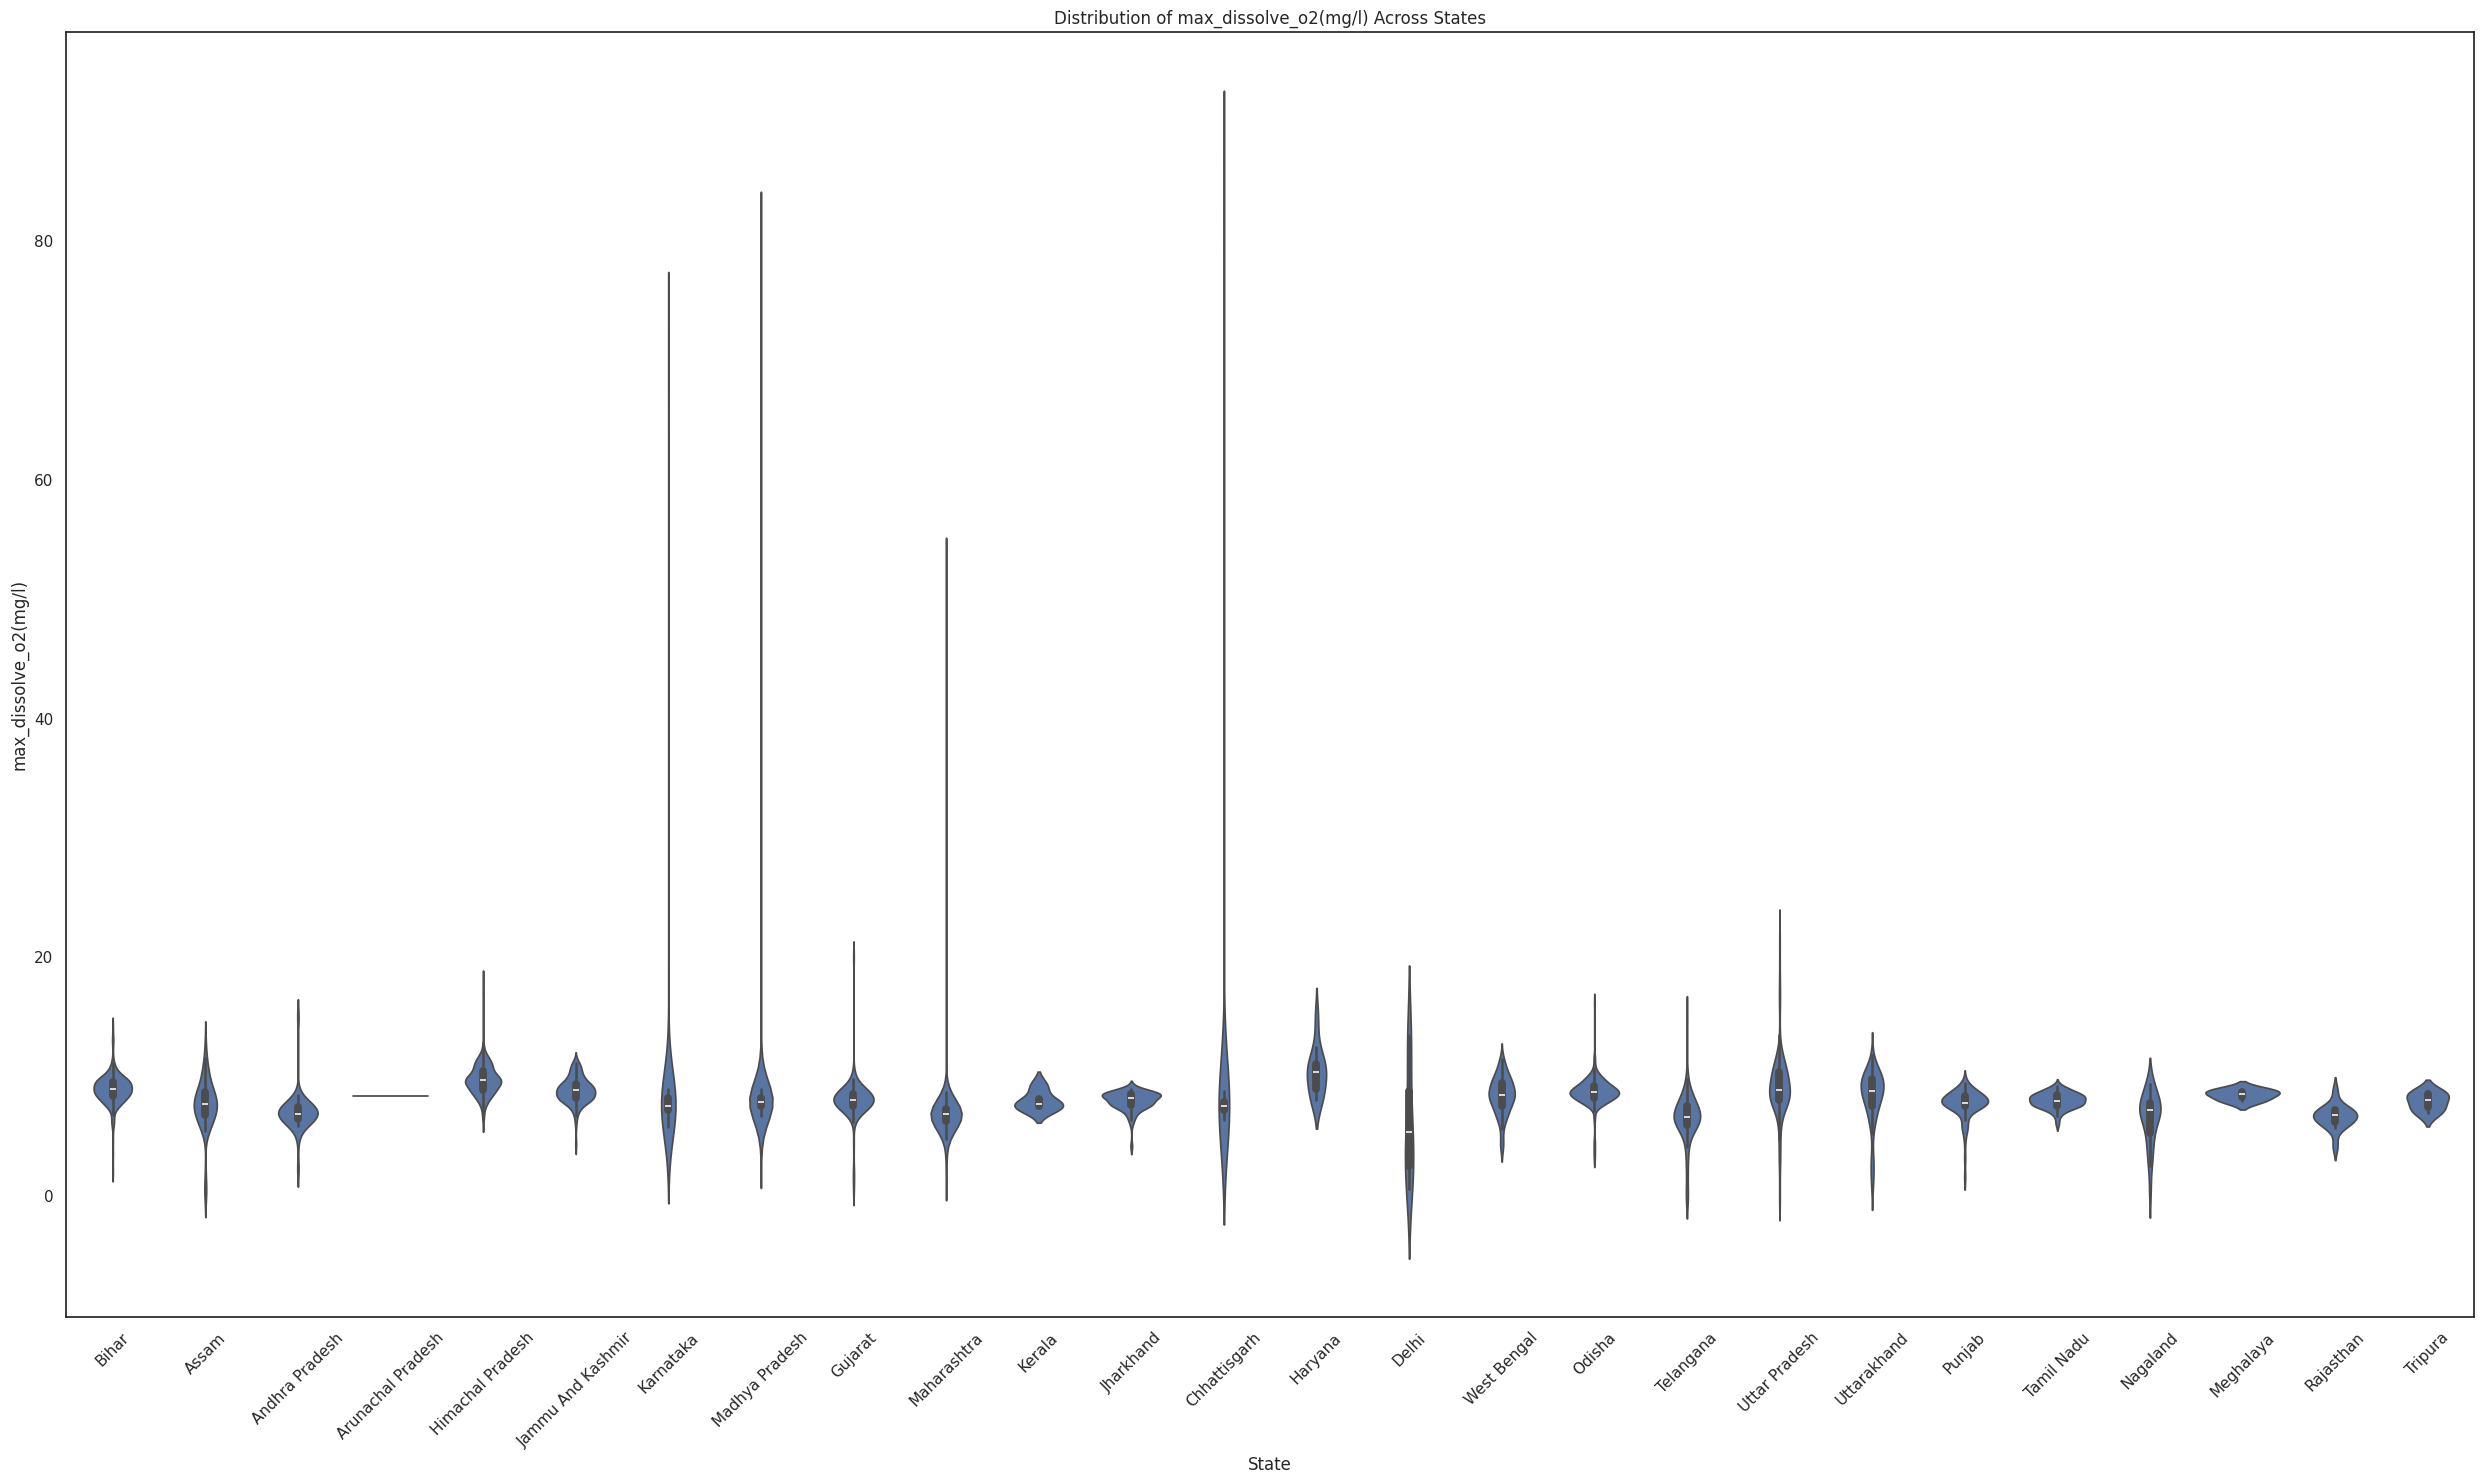

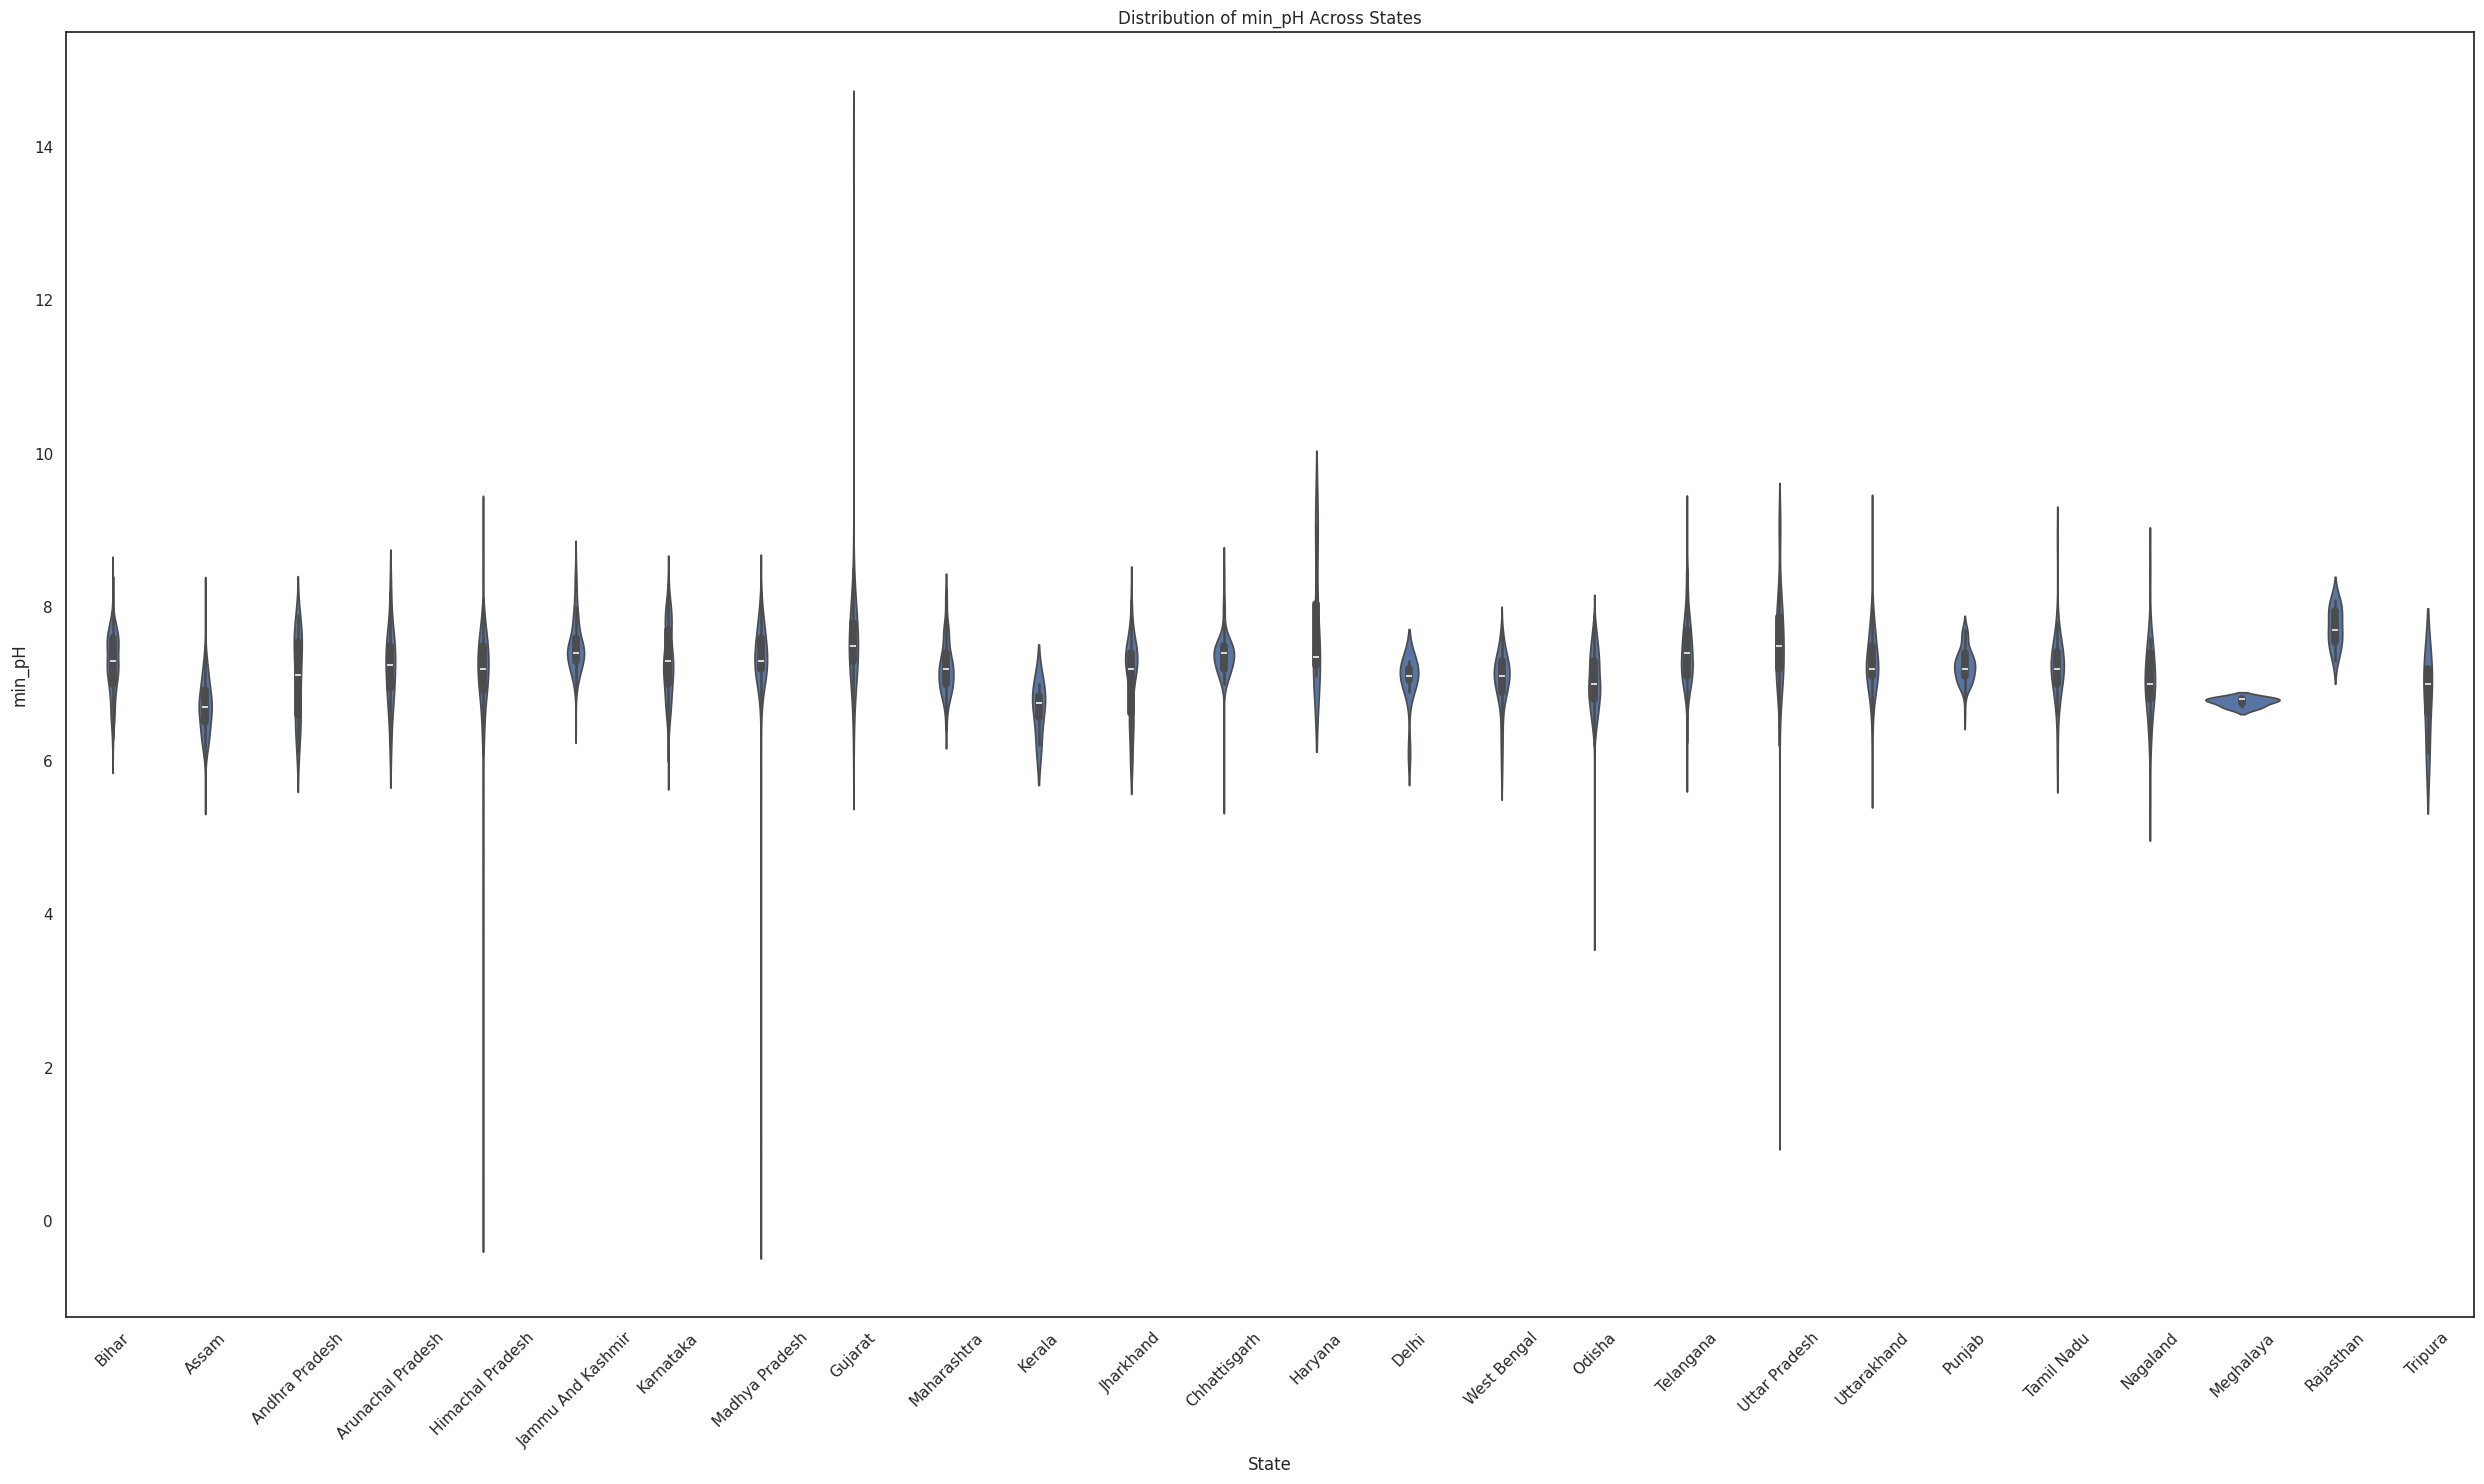

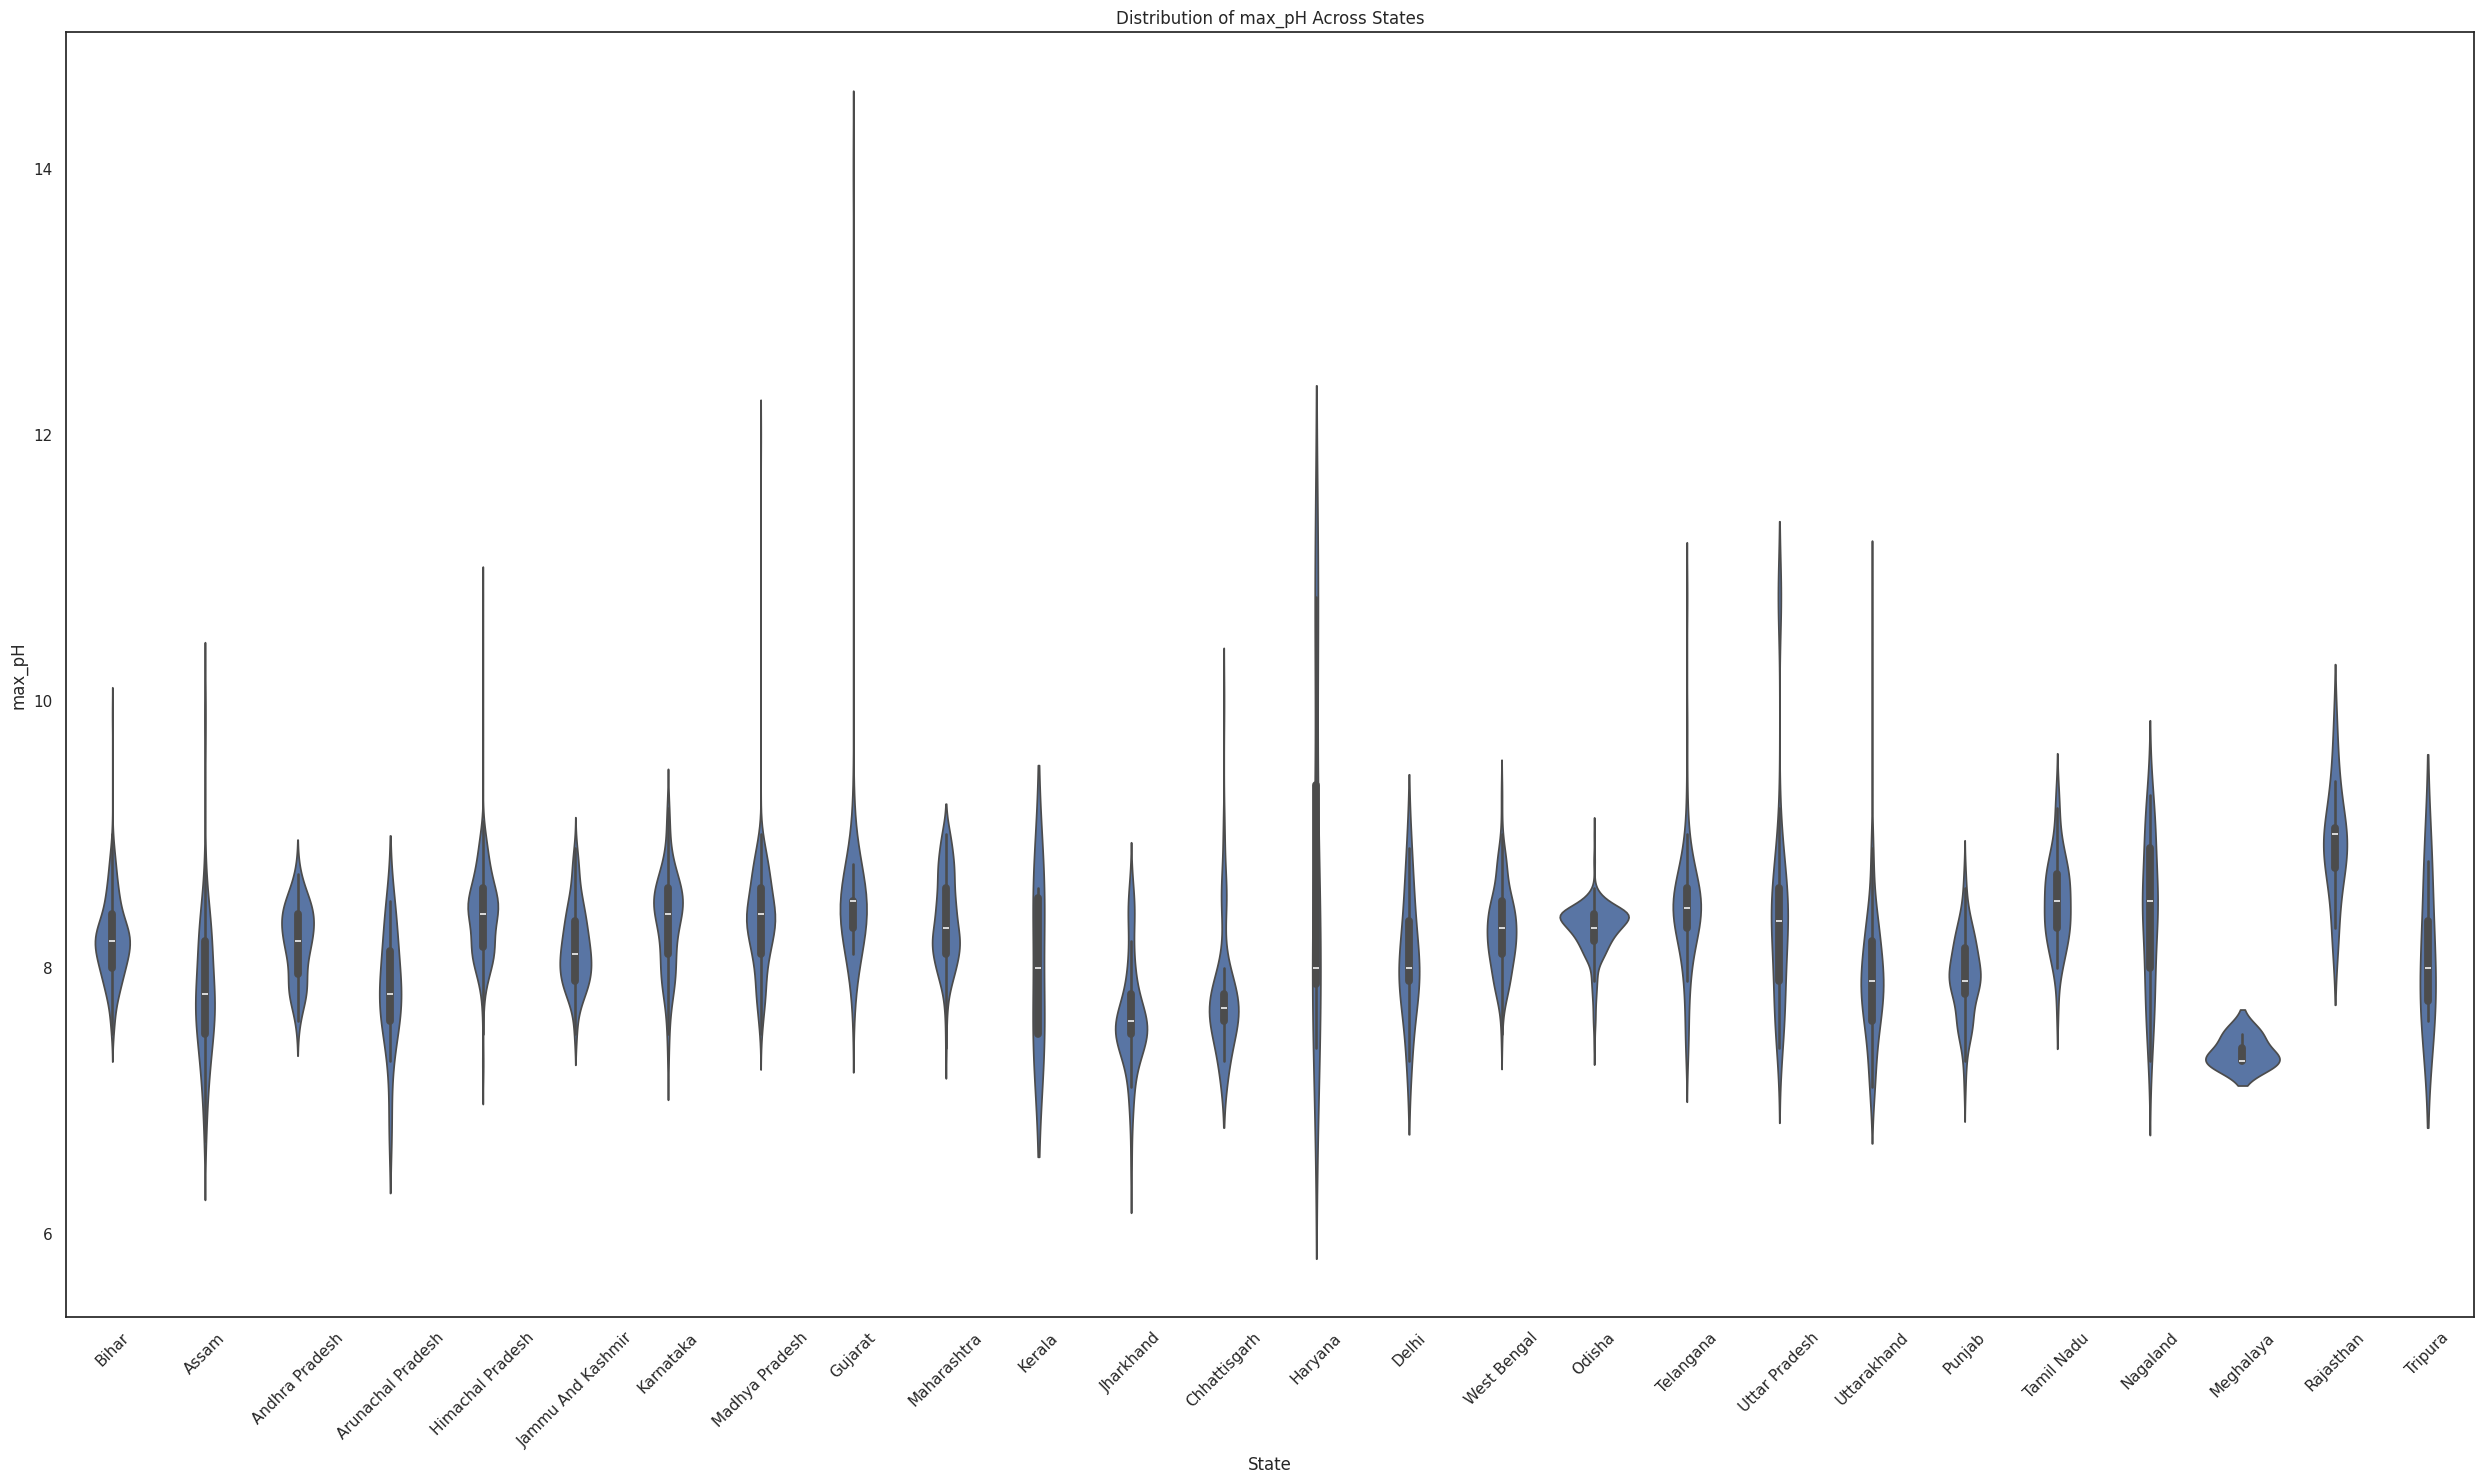

In [ ]:
parameters_of_interest = [
    'min_temp', 'max_temp', 'min_dissolve_o2(mg/l)', 'max_dissolve_o2(mg/l)',
    'min_pH', 'max_pH'
]

# Plot violin plots for each parameter across states
for parameter in parameters_of_interest:
    plt.figure(figsize=(25, 15))  # Set the figure size for each plot
    sns.violinplot(y=parameter, x='State', data=cleaned_df)
    plt.title(f"Distribution of {parameter} Across States")
    plt.xlabel('State')
    plt.ylabel(parameter)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# **Yearly variation in Parameters (Line Plot):**

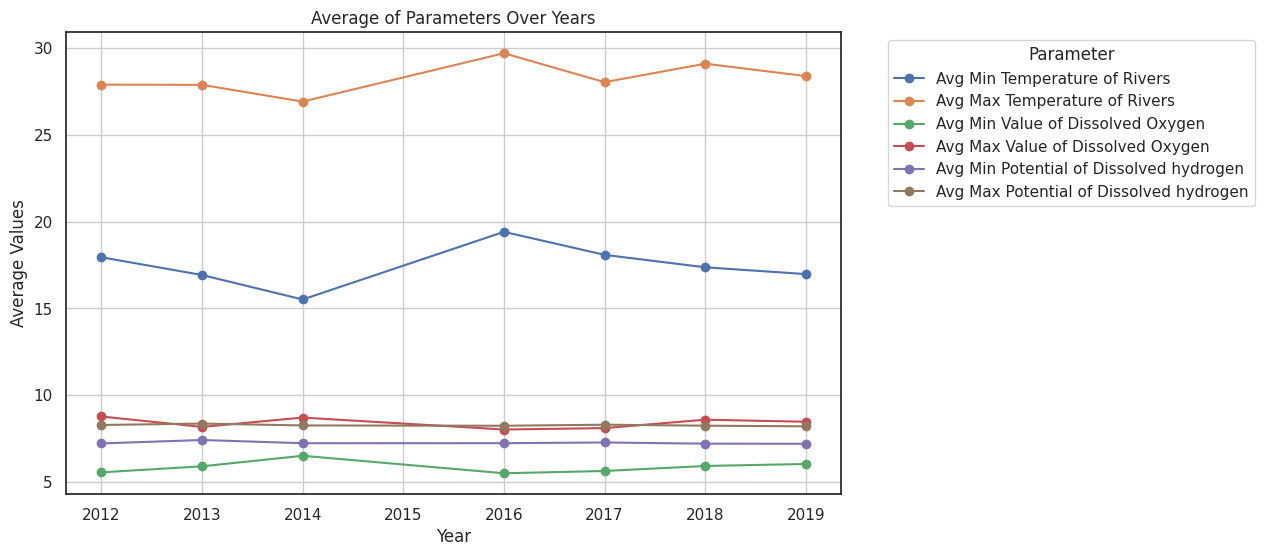

In [ ]:
avg_data = cleaned_df.groupby('Year').agg({
    'min_temp': 'mean',
     'max_temp': 'mean',
    'min_dissolve_o2(mg/l)': 'mean',
    'max_dissolve_o2(mg/l)': 'mean',
    'min_pH': 'mean',
      'max_pH': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_data['Year'], avg_data['min_temp'], label='Avg Min Temperature of Rivers', marker='o')
plt.plot(avg_data['Year'], avg_data['max_temp'], label='Avg Max Temperature of Rivers', marker='o')
plt.plot(avg_data['Year'], avg_data['min_dissolve_o2(mg/l)'], label='Avg Min Value of Dissolved Oxygen', marker='o')
plt.plot(avg_data['Year'], avg_data['max_dissolve_o2(mg/l)'], label='Avg Max Value of Dissolved Oxygen', marker='o')
plt.plot(avg_data['Year'], avg_data['min_pH'], label='Avg Min Potential of Dissolved hydrogen', marker='o')
plt.plot(avg_data['Year'], avg_data['max_pH'], label='Avg Max Potential of Dissolved hydrogen', marker='o')

plt.title('Average of Parameters Over Years')
plt.xlabel('Year')
plt.ylabel('Average Values')
plt.grid(True)
plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left',facecolor='white')
plt.show()


# **Standard deviation of Parameters:**

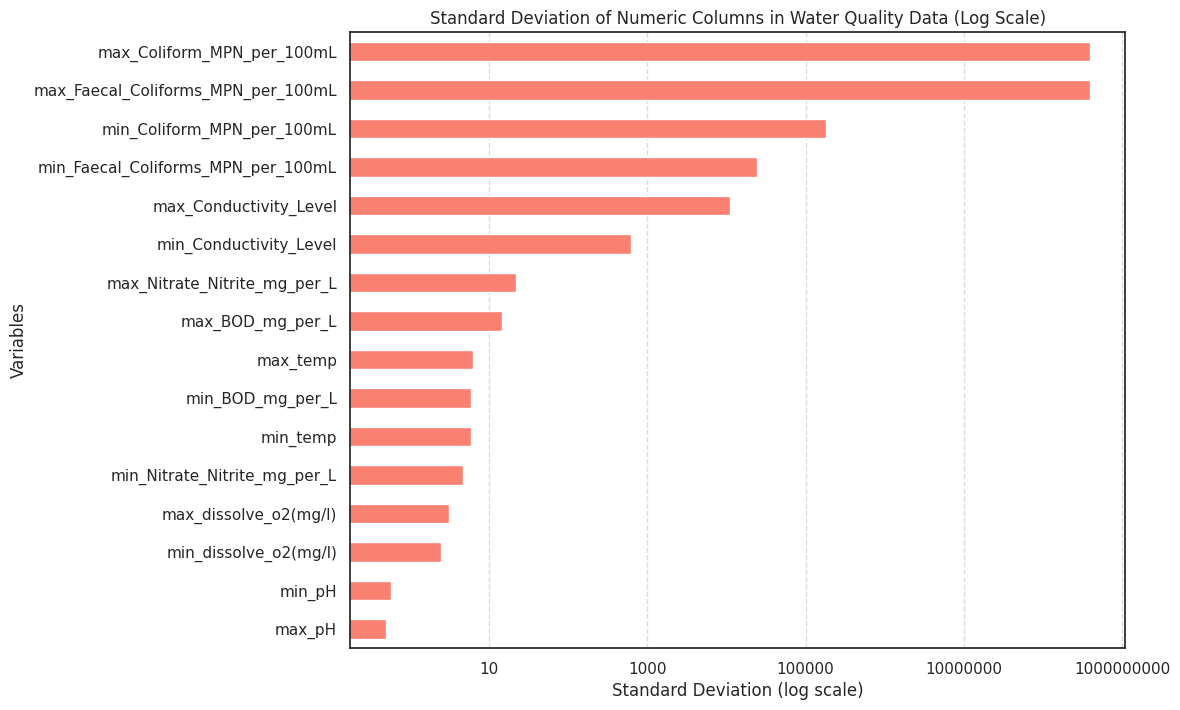

In [ ]:
numeric_columns = cleaned_df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop(['Year', 'Station Code'])  # Exclude 'year' column

standard_deviations = cleaned_df[numeric_columns].std()
standard_deviations = standard_deviations.round(2)

# Plotting
plt.figure(figsize=(10, 8))
standard_deviations_sorted = standard_deviations.sort_values()
standard_deviations_sorted.plot(kind='barh', color='salmon', logx=True)
plt.title('Standard Deviation of Numeric Columns in Water Quality Data (Log Scale)')
plt.xlabel('Standard Deviation (log scale)')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Setting formatter for non-scientific notation
formatter = plt.ScalarFormatter()
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()


#**Stacked Bar: State-wise parameters 2012-2019**

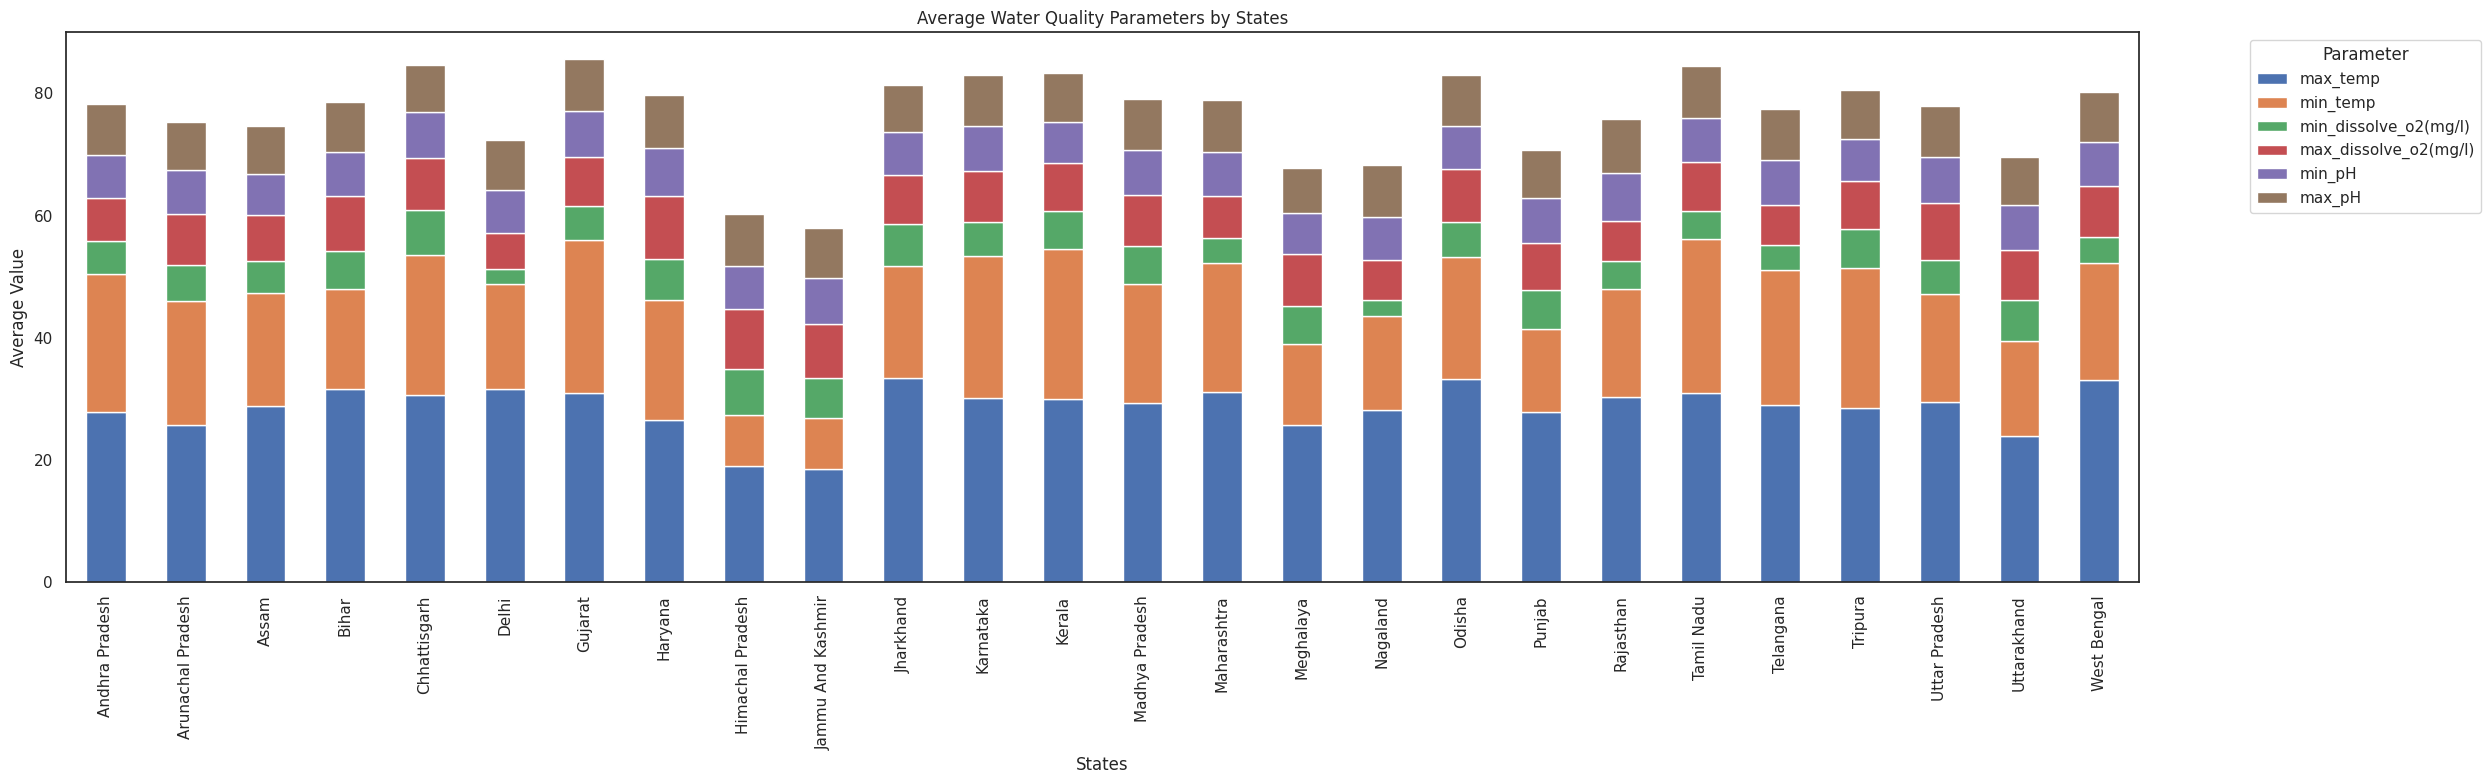

In [ ]:
parameters_of_interest = [
    'max_temp',
    'min_temp',
    'min_dissolve_o2(mg/l)',
     'max_dissolve_o2(mg/l)',
    'min_pH',
     'max_pH'
]

grouped_data = cleaned_df.groupby('State')[parameters_of_interest].mean()

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(25, 8))

# Adding titles and labels
plt.title('Average Water Quality Parameters by States')
plt.xlabel('States')
plt.ylabel('Average Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left',facecolor='white')

plt.tight_layout()
plt.show()


# ***Statistical Analysis***

# **Central Limit Theorem (Min Temp):**

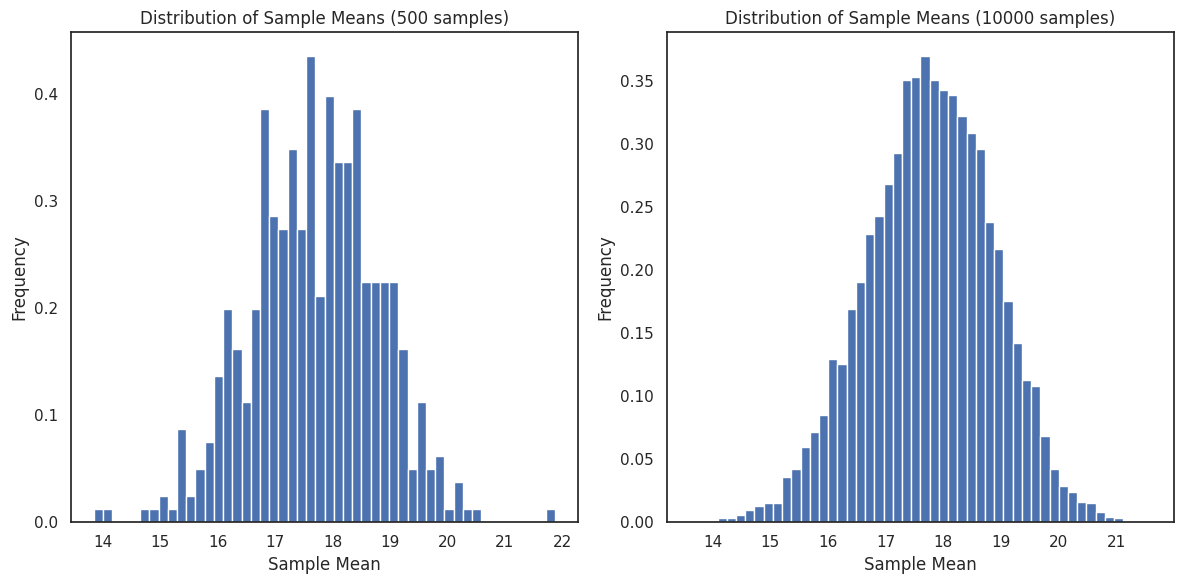

In [ ]:
parameter='min_temp'
updated_df = cleaned_df[parameter].dropna()

# Apply CLT for the first plot
sample_size = 30  # As an example
num_samples = 500  # The number of samples to draw
sample_means1 = [updated_df.sample(sample_size).mean() for _ in range(num_samples)]

plt.figure(figsize=(12, 6))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(sample_means1, bins=50, density=True)
plt.title('Distribution of Sample Means (500 samples)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

# Ensure the data is clean
updated2_df = cleaned_df[parameter].dropna()

# Apply CLT for the second plot
sample_size = 30
num_samples = 10000
sample_means2 = [updated2_df.sample(sample_size).mean() for _ in range(num_samples)]

# Create the second subplot
plt.subplot(1, 2, 2)
plt.hist(sample_means2, bins=50, density=True)
plt.title('Distribution of Sample Means (10000 samples)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### **Standard Error:**

In [ ]:
import numpy as np
# Calculate the standard deviation of the sample means
std_dev_sample_means = np.std(sample_means1, ddof=1)  # Using Bessel's correction

# Calculate the Standard Error of the Mean (SEM)
sem = std_dev_sample_means / np.sqrt(sample_size)

# Output the SEM
print(f"The Standard Error of the Mean (SEM) for 500 samples is: {sem:.4f}")

# Calculate the standard deviation of the sample means
std_dev_sample_means = np.std(sample_means2, ddof=1)  # Using Bessel's correction

# Calculate the Standard Error of the Mean (SEM)
sem = std_dev_sample_means / np.sqrt(sample_size)

# Output the SEM
print(f"The Standard Error of the Mean (SEM) for 10000 samples is: {sem:.4f}")


The Standard Error of the Mean (SEM) for 500 samples is: 0.2025
The Standard Error of the Mean (SEM) for 10000 samples is: 0.2005


# **Bootstrap sampling (Min Temp):**





Confidence Interval (95.0%): [15.51325, 19.785129615082482]


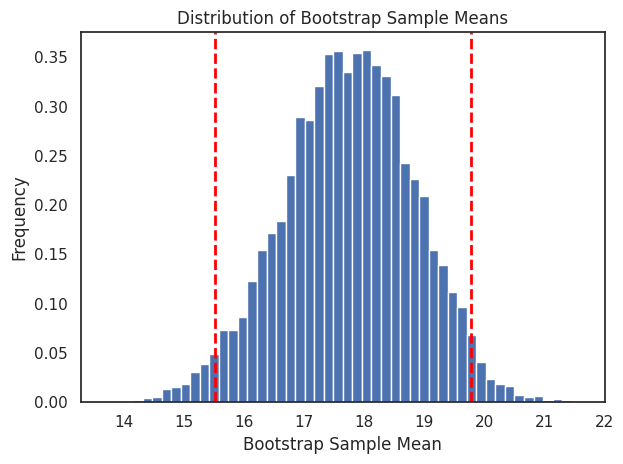

In [ ]:
parameter = 'min_temp'
updated3_df = cleaned_df[parameter].dropna()

sample_size = 30
num_samples = 10000
bootstrap_sample_means = []

for _ in range(num_samples):
    bootstrap_sample = np.random.choice(updated3_df, size=sample_size, replace=True)
    bootstrap_sample_means.append(np.mean(bootstrap_sample))

plt.hist(bootstrap_sample_means, bins=50, density=True)
plt.title('Distribution of Bootstrap Sample Means')
plt.xlabel('Bootstrap Sample Mean')
plt.ylabel('Frequency')
confidence_level = 0.95
alpha = (1 - confidence_level) / 2

# Determine the lower and upper percentiles
lower_percentile = 100 * alpha
upper_percentile = 100 * (1 - alpha)

# Calculate the confidence interval
lower_bound = np.percentile(bootstrap_sample_means, lower_percentile)
upper_bound = np.percentile(bootstrap_sample_means, upper_percentile)

print(f"Confidence Interval ({confidence_level*100}%): [{lower_bound}, {upper_bound}]")
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)
plt.tight_layout()




# Show the plot
plt.show()


# **Normal Distribution:**

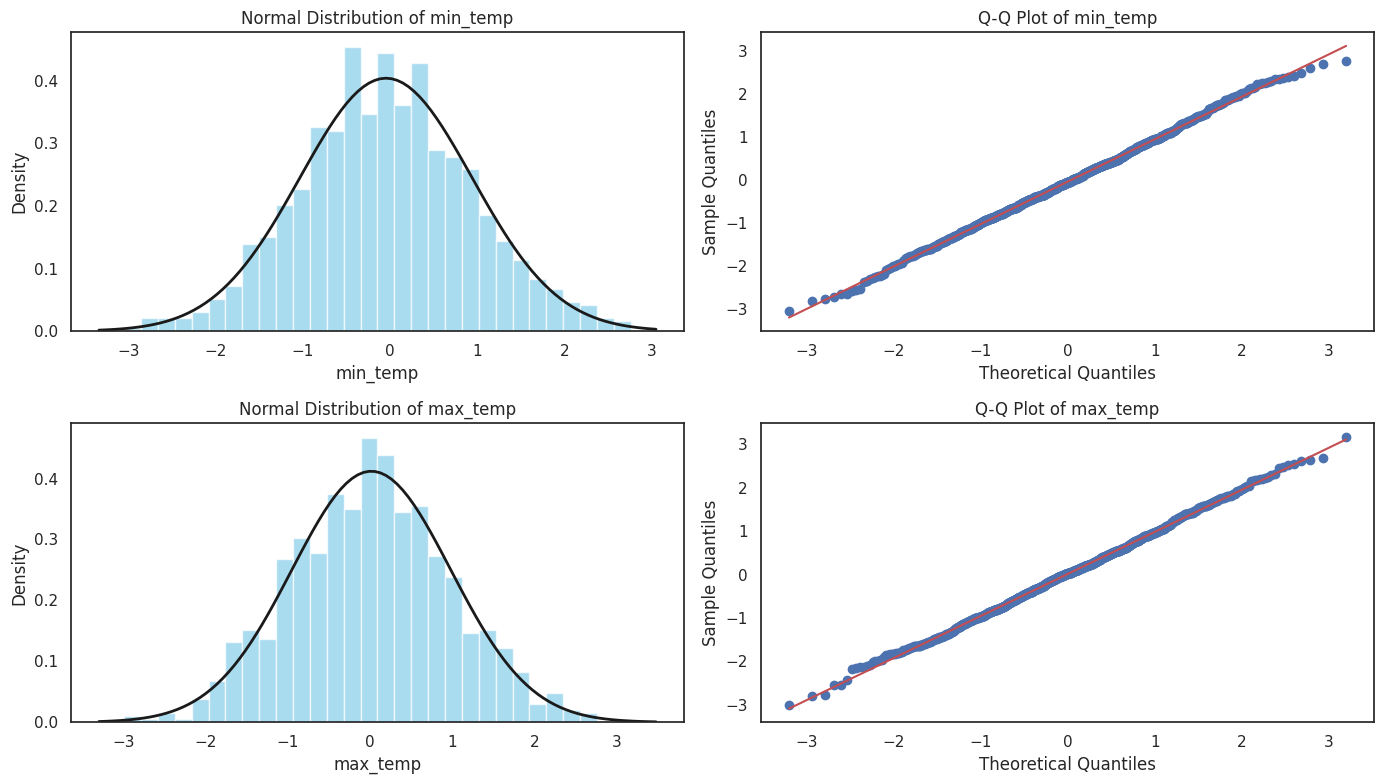

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

cleaned_df2 = cleaned_df.copy()
np.random.seed(0)
cleaned_df2 = pd.DataFrame({
    'min_temp': np.random.normal(0, 1, 1000),
    'max_temp': np.random.normal(0, 1, 1000)
})

numeric_columns = ['min_temp', 'max_temp']

fig, axs = plt.subplots(len(numeric_columns), 2, figsize=(14, 8))

for i, column in enumerate(numeric_columns):
    data = cleaned_df2[column].dropna()

    # Plot histogram and normal distribution curve on the left subplot
    mu, sigma = np.mean(data), np.std(data)
    axs[i, 0].hist(data, bins=30, density=True, alpha=0.7, color='skyblue')
    xmin, xmax = axs[i, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma)
    axs[i, 0].plot(x, p, 'k', linewidth=2)
    axs[i, 0].set_title(f'Normal Distribution of {column}')
    axs[i, 0].set_xlabel(column)
    axs[i, 0].set_ylabel('Density')

    # Create a Q-Q plot on the right subplot
    stats.probplot(data, dist="norm", plot=axs[i, 1])
    axs[i, 1].set_title(f'Q-Q Plot of {column}')
    axs[i, 1].set_xlabel('Theoretical Quantiles')
    axs[i, 1].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()


# **State-wise count of data**

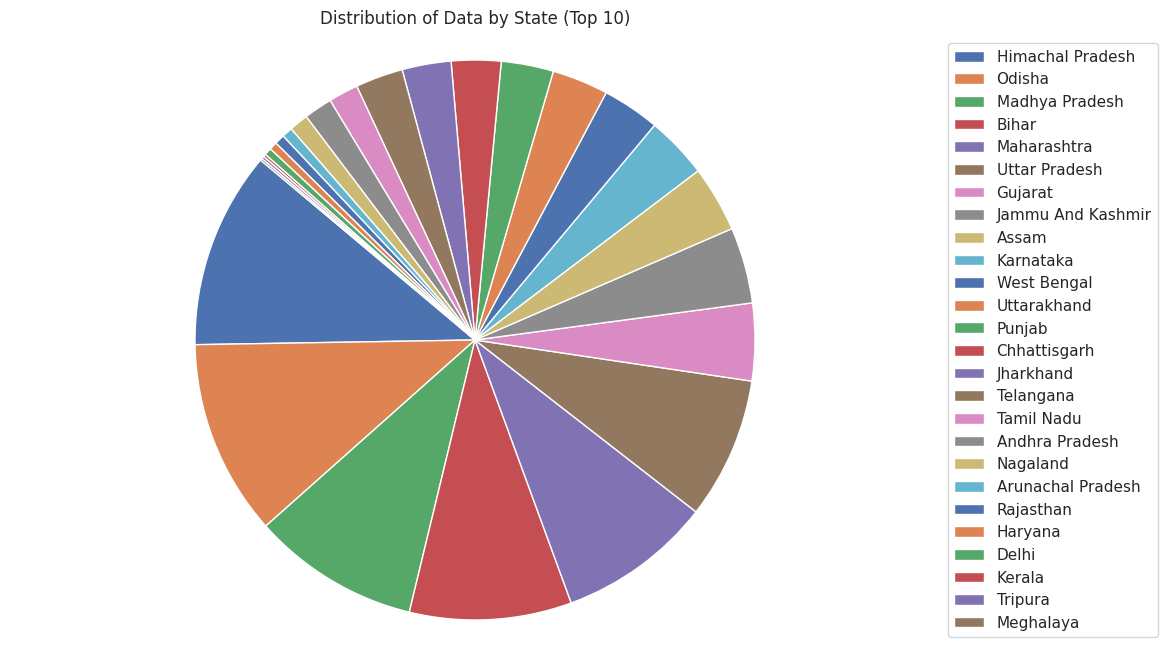

In [ ]:
import matplotlib.pyplot as plt
# print(cleaned_df.columns)

state_distribution = cleaned_df['State'].value_counts()

plt.figure(figsize=(12, 8))
patches, texts = plt.pie(state_distribution, startangle=140)
plt.title('Distribution of Data by State (Top 10)')
plt.axis('equal')
# Adding a legend outside the plot
plt.legend(patches, state_distribution.index, loc='center left', bbox_to_anchor=(1, 0.5), facecolor='white')
plt.show()




### **Top 10 states **

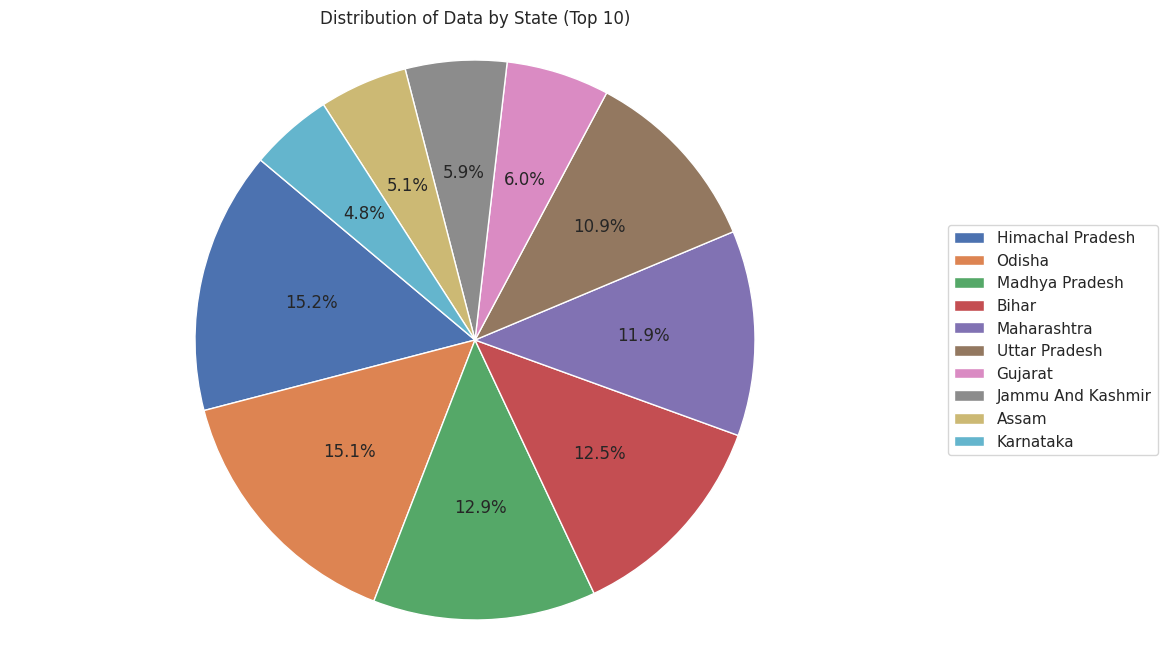

In [ ]:
import matplotlib.pyplot as plt

top_10_states= state_distribution.head(10)
plt.figure(figsize=(12, 8))
patches, texts, autotexts = plt.pie(top_10_states, startangle=140, autopct='%1.1f%%')

# Title for the plot
plt.title('Distribution of Data by State (Top 10)')

plt.axis('equal')

plt.legend(patches, top_10_states.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


# **State wise Pivot Table**

In [ ]:

from tabulate import tabulate

pivot_table = cleaned_df.pivot_table(
    values=['min_temp', 'max_temp', 'min_pH'],
    index=['State', 'Name Of The Station'],
    aggfunc='min'
)

# Resetting the index to turn 'State' and 'Name Of The Station' into columns
pivot_table_reset = pivot_table.reset_index()

# Using tabulate to print the table with fancy grid format
table = tabulate(pivot_table_reset, headers='keys', tablefmt='fancy_grid')

# Display the table
print(table)

╒══════╤═══════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════╤══════════╤════════════╕
│      │ State             │ Name Of The Station                                                                                                                  │   max_temp │   min_pH │   min_temp │
╞══════╪═══════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪════════════╪══════════╪════════════╡
│    0 │ Andhra Pradesh    │ AMARAVATI , GUNTUR DIST                                                                                                              │    22      │  6.2     │    18      │
├──────┼───────────────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼────────────┼──────────┼─────────

# **Analyzing parameter safety for Gujarat:**

In [ ]:
from tabulate import tabulate

# Assuming your dataset is named 'cleaned_df' and the state column is 'State'
gujarat_df = cleaned_df[cleaned_df['State'] == 'Gujarat']

# Select only the columns related to elements
element_columns = ['min_temp', 'max_temp', 'min_dissolve_o2(mg/l)', 'min_pH','max_pH', 'max_dissolve_o2(mg/l)',
                   'min_Conductivity_Level', 'max_Conductivity_Level', 'min_Nitrate_Nitrite_mg_per_L',
                   'max_Nitrate_Nitrite_mg_per_L', 'min_BOD_mg_per_L', 'max_BOD_mg_per_L',
                   'min_Faecal_Coliforms_MPN_per_100mL', 'max_Faecal_Coliforms_MPN_per_100mL',
                   'min_Coliform_MPN_per_100mL', 'max_Coliform_MPN_per_100mL']

# Calculate mean values for each element parameter
mean_values = gujarat_df[element_columns].mean()

# Define safe limits for each parameter
safe_limits = {
    'min_temp': (5, 25),
    'max_temp': (5, 25),
    'min_pH' : (6.5 , 8),
    'max_pH' : (6.5 , 8),
    'min_dissolve_o2(mg/l)': (6.5, 8),
    'max_dissolve_o2(mg/l)': (6.5, 8),
    'min_Conductivity_Level': (200, 1000),
    'max_Conductivity_Level': (200, 1000),
    'min_Nitrate_Nitrite_mg_per_L': (0, 1.0),
    'max_Nitrate_Nitrite_mg_per_L': (0, 1.0),
    'min_BOD_mg_per_L': (0, 5),
    'max_BOD_mg_per_L': (0, 5),
    'min_Faecal_Coliforms_MPN_per_100mL': (0, 200),
    'max_Faecal_Coliforms_MPN_per_100mL': (0, 200),
    'min_Coliform_MPN_per_100mL': (0, 200),
    'max_Coliform_MPN_per_100mL': (0, 200)
}

# Check which parameters exceed the safe limits
exceeds_limits = {param: ((mean_values[param] < low_limit) or (mean_values[param] > high_limit)) for param, (low_limit, high_limit) in safe_limits.items()}

# Prepare data for table
table_data = []
for param, (low_limit, high_limit) in safe_limits.items():
    table_data.append([param, mean_values[param], f"{low_limit} - {high_limit}", 'Yes' if exceeds_limits[param] else 'No'])

# Print table
print(tabulate(table_data, headers=["Parameter", "Mean Value", "Safe Limits", "Exceeds Safe Limits"], tablefmt="fancy_grid"))


╒════════════════════════════════════╤══════════════╤═══════════════╤═══════════════════════╕
│ Parameter                          │   Mean Value │ Safe Limits   │ Exceeds Safe Limits   │
╞════════════════════════════════════╪══════════════╪═══════════════╪═══════════════════════╡
│ min_temp                           │     24.9521  │ 5 - 25        │ No                    │
├────────────────────────────────────┼──────────────┼───────────────┼───────────────────────┤
│ max_temp                           │     31       │ 5 - 25        │ Yes                   │
├────────────────────────────────────┼──────────────┼───────────────┼───────────────────────┤
│ min_pH                             │      7.59402 │ 6.5 - 8       │ No                    │
├────────────────────────────────────┼──────────────┼───────────────┼───────────────────────┤
│ max_pH                             │      8.53205 │ 6.5 - 8       │ Yes                   │
├────────────────────────────────────┼──────────────┼───────

**Which station has lowest ph over the years?**

In [ ]:
grouped_by_year = cleaned_df.groupby('Year')

# Then, within each year, find the row with the highest 'min_pH' value
lighest_pH_per_year_indices = grouped_by_year['min_pH'].idxmin()

# Use these indices to get the corresponding rows from the DataFrame
lighest_pH_stations_per_year = cleaned_df.loc[lighest_pH_per_year_indices]

# Reset the index to remove the original DataFrame indices
lighest_pH_stations_per_year = lighest_pH_stations_per_year.reset_index(drop=True)

# Select only the relevant columns to display
table = lighest_pH_stations_per_year[['Year', 'State', 'Name Of The Station', 'min_pH']]

# Print the table using the 'tabulate' library for a fancy grid format
print(tabulate(table, headers='keys', tablefmt='fancy_grid'))

╒════╤════════╤══════════════════╤══════════════════════════════╤══════════╕
│    │   Year │ State            │ Name Of The Station          │   min_pH │
╞════╪════════╪══════════════════╪══════════════════════════════╪══════════╡
│  0 │   2012 │ Himachal Pradesh │ GIRI AT U/S CCI MINES        │      0   │
├────┼────────┼──────────────────┼──────────────────────────────┼──────────┤
│  1 │   2013 │ Himachal Pradesh │ BEAS AT D/S ALAMPUR, H.P.    │      6   │
├────┼────────┼──────────────────┼──────────────────────────────┼──────────┤
│  2 │   2014 │ Madhya Pradesh   │ TAPI AT BURHANPUR M.P.       │      0   │
├────┼────────┼──────────────────┼──────────────────────────────┼──────────┤
│  3 │   2016 │ Himachal Pradesh │ LARGI AT D/S MANDI           │      4.2 │
├────┼────────┼──────────────────┼──────────────────────────────┼──────────┤
│  4 │   2017 │ Assam            │ SANKOSH RIVER, DHUBRI, ASSAM │      6.2 │
├────┼────────┼──────────────────┼──────────────────────────────┼──────────┤

### **Which station has highest pH over the years?**

In [ ]:
grouped_by_year = cleaned_df.groupby('Year')

# Then, within each year, find the row with the highest 'min_pH' value
highest_pH_per_year_indices = grouped_by_year['max_pH'].idxmax()

# Use these indices to get the corresponding rows from the DataFrame
highest_pH_stations_per_year = cleaned_df.loc[highest_pH_per_year_indices]

# Reset the index to remove the original DataFrame indices
highest_pH_stations_per_year = highest_pH_stations_per_year.reset_index(drop=True)

# Select only the relevant columns to display
table = highest_pH_stations_per_year[['Year', 'State', 'Name Of The Station', 'max_pH']]

# Print the table using the 'tabulate' library for a fancy grid format
print(tabulate(table, headers='keys', tablefmt='fancy_grid'))

╒════╤════════╤════════════════╤════════════════════════════════════════════════════╤══════════╕
│    │   Year │ State          │ Name Of The Station                                │   max_pH │
╞════╪════════╪════════════════╪════════════════════════════════════════════════════╪══════════╡
│  0 │   2012 │ Haryana        │ YAMUNA AT HATHNIKUND                               │  10.7872 │
├────┼────────┼────────────────┼────────────────────────────────────────────────────┼──────────┤
│  1 │   2013 │ Uttar Pradesh  │ YAMUNA AT AGRA U/S, U.P.                           │  10.7872 │
├────┼────────┼────────────────┼────────────────────────────────────────────────────┼──────────┤
│  2 │   2014 │ Uttar Pradesh  │ YAMUNA AT AGRA U/S, U.P.                           │  10.7872 │
├────┼────────┼────────────────┼────────────────────────────────────────────────────┼──────────┤
│  3 │   2016 │ Madhya Pradesh │ NARMADA AT HOSHANGABAD D S                         │  12      │
├────┼────────┼───────────────

### **Which station has lowest temp over the years?**

In [ ]:
grouped_by_year = cleaned_df.groupby('Year')

# Then, within each year, find the row with the highest 'min_pH' value
lighest_temp_per_year_indices = grouped_by_year['min_temp'].idxmin()

# Use these indices to get the corresponding rows from the DataFrame
lighest_temp_stations_per_year = cleaned_df.loc[lighest_pH_per_year_indices]

# Reset the index to remove the original DataFrame indices
lighest_temp_stations_per_year = lighest_temp_stations_per_year.reset_index(drop=True)

# Select only the relevant columns to display
table = lighest_pH_stations_per_year[['Year', 'State', 'Name Of The Station', 'min_temp']]

# Print the table using the 'tabulate' library for a fancy grid format
print(tabulate(table, headers='keys', tablefmt='fancy_grid'))

╒════╤════════╤══════════════════╤══════════════════════════════╤════════════╕
│    │   Year │ State            │ Name Of The Station          │   min_temp │
╞════╪════════╪══════════════════╪══════════════════════════════╪════════════╡
│  0 │   2012 │ Himachal Pradesh │ GIRI AT U/S CCI MINES        │         12 │
├────┼────────┼──────────────────┼──────────────────────────────┼────────────┤
│  1 │   2013 │ Himachal Pradesh │ BEAS AT D/S ALAMPUR, H.P.    │         10 │
├────┼────────┼──────────────────┼──────────────────────────────┼────────────┤
│  2 │   2014 │ Madhya Pradesh   │ TAPI AT BURHANPUR M.P.       │         18 │
├────┼────────┼──────────────────┼──────────────────────────────┼────────────┤
│  3 │   2016 │ Himachal Pradesh │ LARGI AT D/S MANDI           │          7 │
├────┼────────┼──────────────────┼──────────────────────────────┼────────────┤
│  4 │   2017 │ Assam            │ SANKOSH RIVER, DHUBRI, ASSAM │         22 │
├────┼────────┼──────────────────┼──────────────────

### **Which station has maximum Coliform over the years?**

In [ ]:
grouped_by_year = cleaned_df.groupby('Year')

# Then, within each year, find the row with the highest 'min_pH' value
highest_pH_per_year_indices = grouped_by_year['max_Coliform_MPN_per_100mL'].idxmax()

# Use these indices to get the corresponding rows from the DataFrame
highest_pH_stations_per_year = cleaned_df.loc[highest_pH_per_year_indices]

# Reset the index to remove the original DataFrame indices
highest_pH_stations_per_year = highest_pH_stations_per_year.reset_index(drop=True)

# Select only the relevant columns to display
table = highest_pH_stations_per_year[['Year', 'State', 'Name Of The Station', 'max_Coliform_MPN_per_100mL']]

# Print the table using the 'tabulate' library for a fancy grid format
print(tabulate(table, headers='keys', tablefmt='fancy_grid'))

╒════╤════════╤═══════════════════╤══════════════════════════════════════════════════════════════╤══════════════════════════════╕
│    │   Year │ State             │ Name Of The Station                                          │   max_Coliform_MPN_per_100mL │
╞════╪════════╪═══════════════════╪══════════════════════════════════════════════════════════════╪══════════════════════════════╡
│  0 │   2012 │ Delhi             │ YAMUNA AT NIZAMUDDIN                                         │                  2e+10       │
├────┼────────┼───────────────────┼──────────────────────────────────────────────────────────────┼──────────────────────────────┤
│  1 │   2013 │ Jammu And Kashmir │ JHELUM AT AWANTIPORA                                         │                  9.56595e+06 │
├────┼────────┼───────────────────┼──────────────────────────────────────────────────────────────┼──────────────────────────────┤
│  2 │   2014 │ Delhi             │ YAMUNA AT NIZAMUDDIN, DELHI                           

# **Scatter Plot: Dissolved Oxygen and pH Levels**

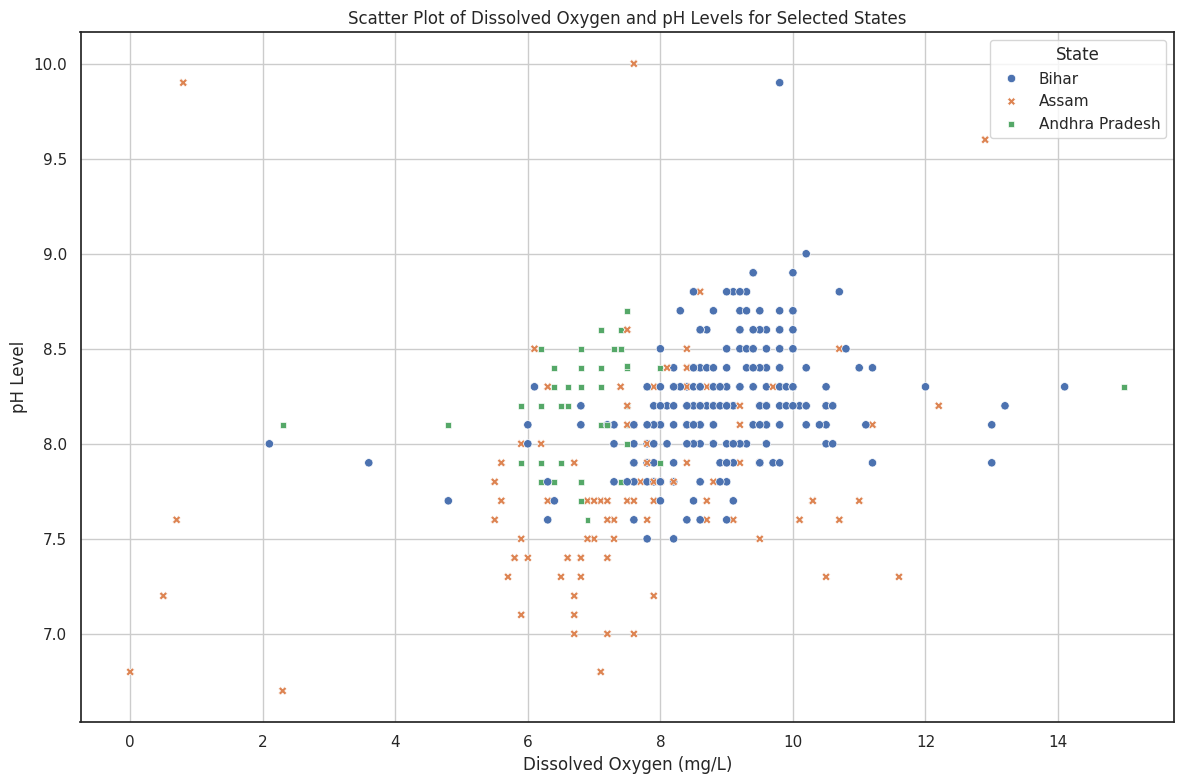

In [ ]:
# Define an example array of states (assuming from the previous outputs)
example_states = ['Bihar', 'Assam', 'Andhra Pradesh']

# Filter the dataset for these states only
filtered_data = cleaned_df[cleaned_df['State'].isin(example_states)]

# Creating a scatter plot for the filtered data
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_data, x=
    'max_dissolve_o2(mg/l)',
     y='max_pH', hue='State', style='State')
plt.title('Scatter Plot of Dissolved Oxygen and pH Levels for Selected States')
plt.xlabel('Dissolved Oxygen (mg/L)')
plt.ylabel('pH Level')
plt.legend(title='State', facecolor='white')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Water Quality Index**

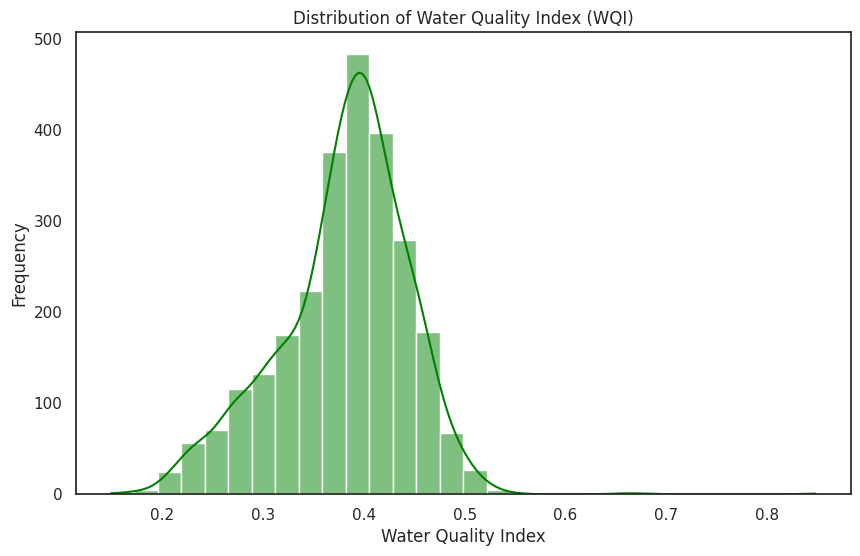

In [ ]:
wqi_data = cleaned_df[[
    'min_temp', 'min_dissolve_o2(mg/l)', 'min_pH'
]].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Calculating WQI as an average of normalized scores
wqi_data['WQI'] = wqi_data.mean(axis=1)

# Plotting the distribution of the Water Quality Index
plt.figure(figsize=(10, 6))
sns.histplot(wqi_data['WQI'], bins=30, kde=True, color='green')
plt.title('Distribution of Water Quality Index (WQI)')
plt.xlabel('Water Quality Index')
plt.ylabel('Frequency')
plt.show()


### **Stations with perfect water quality!**

In [ ]:
criteria = {
    'min_pH': (6.5, 8.5),
    'max_pH': (6.5, 8.5),
    'min_temp': (5, 25),
    'max_temp': (5, 25),
    'min_dissolve_o2(mg/l)': (6.5, 8),
    'max_dissolve_o2(mg/l)': (6.5, 8),
    'min_Conductivity_Level': (200, 1000),
    'max_Conductivity_Level': (200, 1000),
    'min_Nitrate_Nitrite_mg_per_L': (0, 1.0),
    'max_Nitrate_Nitrite_mg_per_L': (0, 1.0),
    'min_BOD_mg_per_L': (0, 5),
    'max_BOD_mg_per_L': (0, 5),
    'min_Faecal_Coliforms_MPN_per_100mL': (0, 2500),
    'max_Faecal_Coliforms_MPN_per_100mL': (0, 2500),
    'min_Coliform_MPN_per_100mL': (0, 1500),
     'max_Coliform_MPN_per_100mL': (0, 1500)
}

yearly_filtered_data = {}

grouped_by_year = cleaned_df.groupby('Year')

for year, group in grouped_by_year:
    year_filtered_data = []

    for idx, row in group.iterrows():
        meets_criteria = all(
            row[parameter] >= criteria[parameter][0] and row[parameter] <= criteria[parameter][1]
            for parameter in criteria
        )

        if meets_criteria:
            year_filtered_data.append((row['Name Of The Station'], row['State']))

    yearly_filtered_data[year] = year_filtered_data

from tabulate import tabulate

tabular_data = []

# Display the results
for year, data in yearly_filtered_data.items():
    print(f"\033[1mYear: {year}\033[0m")  # Bold formatting
    print(f"Number of stations for {year}: {len(data)}")  # Add this line for debugging
    for station, state in data:
        print(f"Station: {station}, State: {state}")
    print()


Year: 2012
Number of stations for 2012: 1
Station: MAHI AT BADNAWAR, State: Madhya Pradesh

Year: 2013
Number of stations for 2013: 0

Year: 2014
Number of stations for 2014: 0

Year: 2016
Number of stations for 2016: 3
Station: AMRAVATI D/S OF DONDAICHA, DHULE, State: Maharashtra
Station: MANJRA D/S OF LATUR NEAR LATURNANDED BRIDGE, BHATKHEDA, LATUR, State: Maharashtra
Station: RANGAVALI D/S OF NAVAPUR, State: Maharashtra

Year: 2017
Number of stations for 2017: 1
Station: SATLUJ AT D/S BHAKHRA, State: Himachal Pradesh

Year: 2018
Number of stations for 2018: 0

Year: 2019
Number of stations for 2019: 1
Station: KSHIPRA AT W/S INTAKE POINT OF DEWAS, UJJAIN, State: Madhya Pradesh



### **Correlation matrix of all parameters**

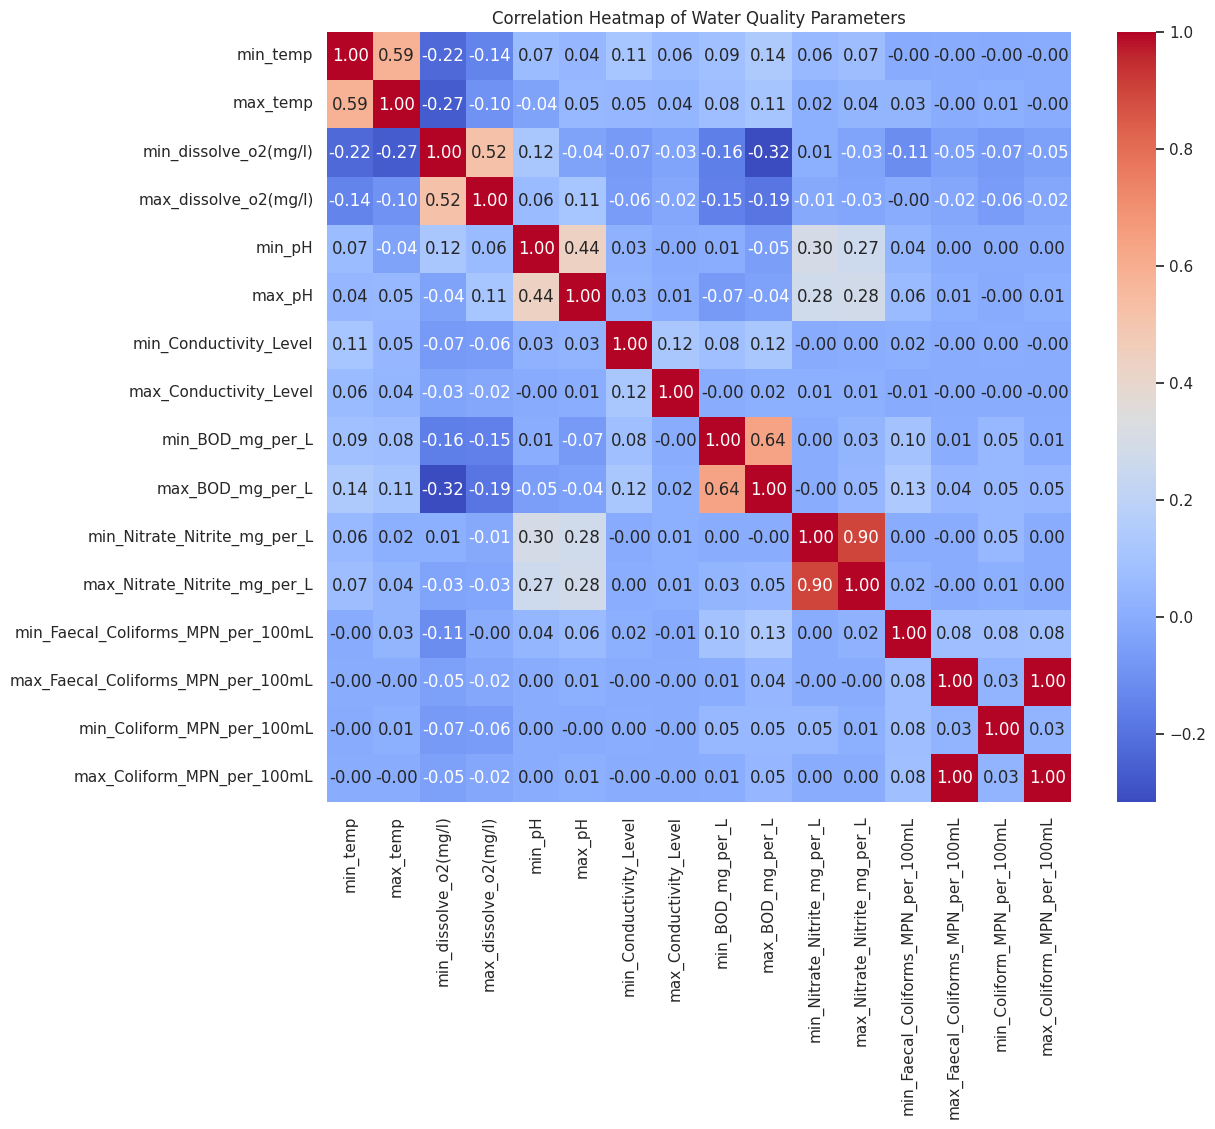

In [ ]:
numeric_columns = cleaned_df.select_dtypes(include=['number']).drop(columns=['Year', 'Station Code'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Water Quality Parameters')
plt.show()


# **Correlation by Cluster**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


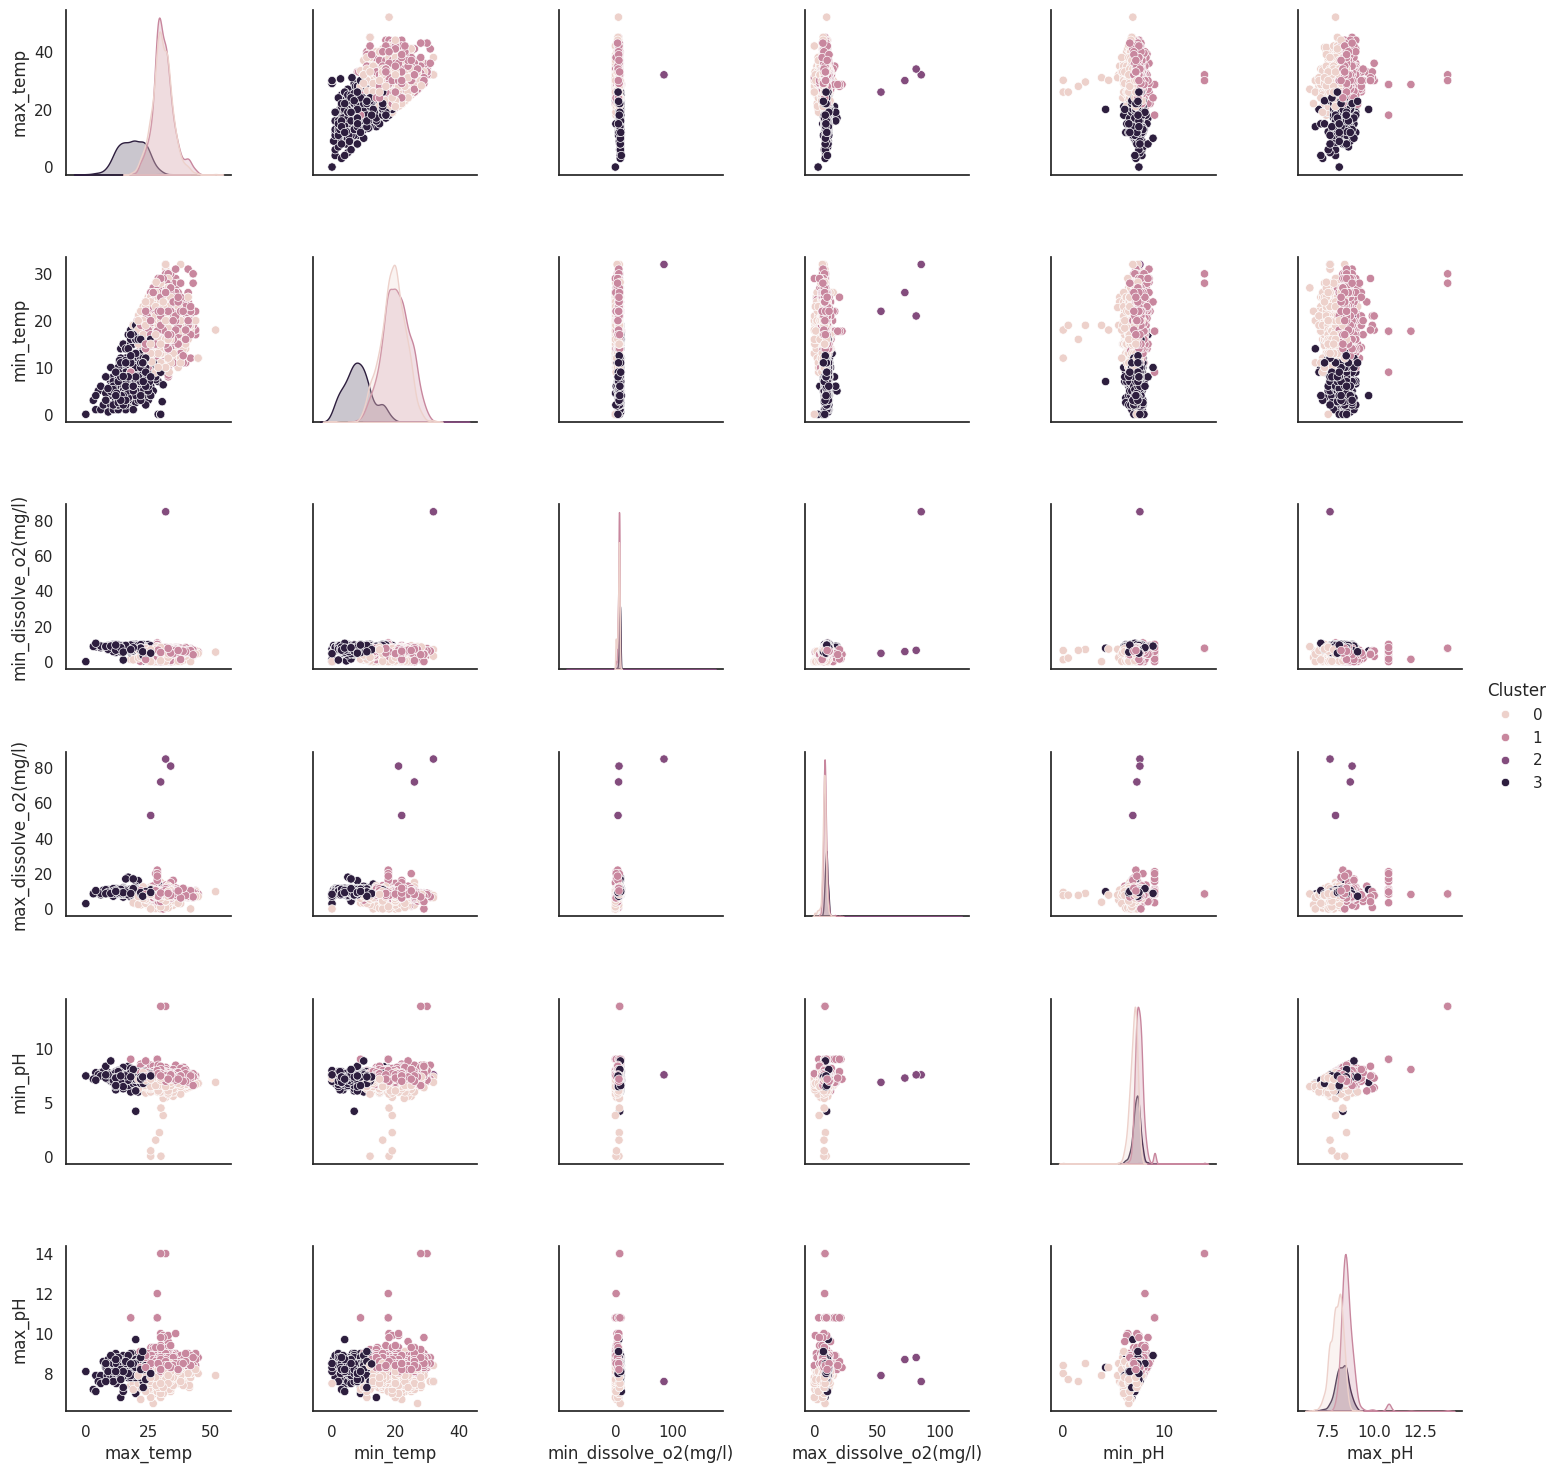

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

columns_of_interest = ['max_temp',
    'min_temp',
    'min_dissolve_o2(mg/l)',
     'max_dissolve_o2(mg/l)',
    'min_pH',
     'max_pH']
selected_data = cleaned_df[columns_of_interest]

selected_data = selected_data.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Perform K-means clustering to group countries
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

selected_data['Cluster'] = clusters

# Visualize clusters
pair_plot = sns.pairplot(selected_data, hue='Cluster')
pair_plot.fig.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

### **t-Test:**
##### Checking the temperature relation between Karnataka and Gujarat

In [ ]:
import scipy.stats as stats

group1 = cleaned_df[cleaned_df['State'] == 'Gujarat']
group2 = cleaned_df[cleaned_df['State'] == 'Karnataka']

t_statistic_min_temp, p_value_min_temp = stats.ttest_ind(group1['min_temp'], group2['min_temp'])

t_statistic_max_temp, p_value_max_temp = stats.ttest_ind(group1['max_temp'], group2['max_temp'])

# Print the results
print("T-test results for min_temp:")
print("T-statistic:", t_statistic_min_temp)
print("P-value:", p_value_min_temp)
print("\nT-test results for max_temp:")
print("T-statistic:", t_statistic_max_temp)
print("P-value:", p_value_max_temp)

T-test results for min_temp:
T-statistic: 3.4199537802943594
P-value: 0.000753073665508718

T-test results for max_temp:
T-statistic: 2.5603131023063375
P-value: 0.01116339623170544


### **Chi-square test:**
#### To check if the Coliform level in Rajasthan is due to Faecal coliform or not?
##### Hypthesis-There is an association between the levels of minimum Faecal Coliforms (MPN per 100 mL) and minimum Coliform (MPN per 100 mL) in water samples collected from stations in Rajasthan.
##### Null Hypothesis- There is no association between the levels of minimum Faecal Coliforms (MPN per 100 mL) and minimum Coliform (MPN per 100 mL) in water samples collected from stations in Rajasthan.

Chi-Square Statistic: 21.666666666666664
P-value: 0.0055722712481949144
Degrees of Freedom: 8


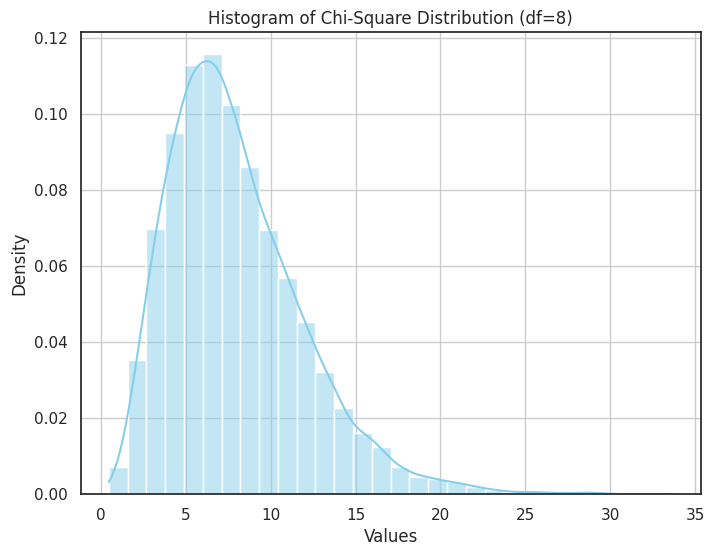

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your dataset is named 'df'
rajasthan_df = cleaned_df[cleaned_df['State'] == 'Rajasthan']

# Create contingency table
contingency_table = pd.crosstab(rajasthan_df['min_Faecal_Coliforms_MPN_per_100mL'], rajasthan_df['min_Coliform_MPN_per_100mL'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Generate data from chi-square distribution
df = 8
chi_data = stats.chi2.rvs(df, size=10000)

# Create histogram plot
plt.figure(figsize=(8, 6))
sns.histplot(chi_data, kde=True, stat="density", color="skyblue", bins=30)
plt.title('Histogram of Chi-Square Distribution (df=8)')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()
